In [1]:
"""
level 2
Script 2:
Any remaining processing with TET. Most of what is required was already done in level 1.
Binning value logic (15 minutes and 1 hour)
Optionally additional visualisations with aggr scl, temp and acc and save figures to system
Convert to python script to use in other scripts if needed
"""

'\nlevel 2\nScript 2:\nAny remaining processing with TET. Currently nothing. All can be taken to analyses directly. Most of what is required was already done in level 1.\nBinning value logic (15 minutes and 1 hour)\nOptionally additional visualisations with aggr scl, temp and acc and save figures to system\n'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [88]:
"""
turning the x and y values obtaining for each day into a function as well
"""
def drop_lead_trail_nans(arr):
    #boolean mask for non-NaN values
    non_nan_mask = ~np.isnan(arr)    
    #finding the indices of the first and last non-NaN values
    first_non_nan = np.argmax(non_nan_mask)  #First True value (non-NaN)
    last_non_nan = len(arr) - np.argmax(non_nan_mask[::-1])  #Last True value (non-NaN)    
    # Slice the array to drop leading and trailing NaNs
    cleaned_arr = arr[first_non_nan:last_non_nan]

    return cleaned_arr

def giv_x_y_vals(mainfolder, qnum, ger):
    #ger = True if subject recruited in Germany. Else False
    if ger:
        question_dict = {
        'q1' : 'Wie wach fühlten Sie sich im Tagesverlauf?',
        'q2' : 'Wie gelangweilt fühlten Sie sich im Tagesverlauf?',
        'q3' : 'Wie sehr haben Sie gezielt versucht  einen oder verschiedene Sinneseindrücke zu vermeiden (z.B. Geruch  Geschmack  Geräusche)?',
        'q4' : 'Wie sehr haben Sie versucht  soziale Interaktion zu vermeiden (virtuell und/oder persönlich)?',
        'q5' : 'Wie sehr haben Sie sich über den Tag hinweg körperlich angespannt gefühlt?',
        'q6' : 'Wie sehr haben Sie sich Sorgen gemacht über gegenwärtige oder zukünftige Ereignisse/Erfahrungen?',
        'q7' : 'Wie sehr haben Sie sich Sorgen oder Gedanken über vergangene Erfahrungen / Ereignisse gemacht?',
        'q8' : 'Wie sehr haben Sie sich im Tagesverlauf gestresst gefühlt?',
        'q9' : 'Wie sehr haben Sie körperliche Schmerzen im Tagesverlauf gehabt?',
        'q10' : 'Falls Sie eine zusätzliche individuelle Erfahrung und ihre Dynamik ergänzen möchten  haben Sie hier Platz. Bitte ergänzen Sie den Namen der Erfahrung als Überschrift  sowie die Ausprägung der Intensität im Graphen links. '
        }    
    
    
    else:
        question_dict = {
        'q1' : 'Question 1: How alert did you feel during the day?',
        'q2' : 'Question 2: How bored did you feel during the day?',
        'q3' : 'Question 3: Were you avoiding stimulation of your senses (touch',
        'q4' : 'Question 4: Were you avoiding social interactions (virtual and/or in person)?',
        'q5' : 'Question 5: How physically tense did you feel throughout the day? ',
        'q6' : 'Question 6: How much were you lost in thoughts worrying about present and future events (e.g.',
        'q7' : 'Question 7: How much were you lost in thoughts worrying about past events (e.g.',
        'q8' : 'Question 8: How stressed did you feel during the day?',
        'q9' : 'Question 9: How strong did you feel physical pain?'
        }
    
    dict_TET_x = {}
    dict_TET_y = {}
    if ger:
        expr = 'TET – Tag';
        # to avoid duplicates in question indices - that could happen if the subject erased graph data instead of submitting the graph
        expr2 = 'Submit rating'; 
        # to make sure at least one data point has been entered by the subject
        expr3 = 'Saved drawing data'
    else:
        expr = 'Daily Experience';
        # to avoid duplicates in question indices - that could happen if the subject erased graph data instead of submitting the graph
        expr2 = 'Submit rating'; 
        # to make sure at least one data point has been entered by the subject
        expr3 = 'Saved drawing data'


    for folder in sorted(os.listdir(mainfolder)):
        print(folder)
        if folder.endswith('.png') or folder.endswith('.csv') or folder.endswith('.txt') or folder.endswith('.xlsx') or folder.endswith('.pdf')or folder.endswith('.edf'):
            continue
        """    
        if folder != '18_3_24_n10_19_3_24_d': #'15_3_24_n7_16_3_24_d':
            continue
        """    
        for file in os.listdir(os.path.join(mainfolder, folder)):
            if file.endswith('_corrected.xlsx'):
                print(file)
                df_tet = pd.read_excel(os.path.join(mainfolder, folder, file))
                if 'MENÜ' in df_tet.columns:
                    pl1 = 'MENÜ'
                    pl2 = 'Press button: Tägliche Erfahrungen'
                    pl3 = 'Unnamed: 3'
                else:
                    pl1 = 'Category'
                    pl2 = 'Action'
                    pl3 = 'Question'
            
                #where expr and expr2 are found in the same row i.e, the rows containing the questions
                mask_tet = (df_tet[pl1] == expr) & (df_tet[pl2] == expr2)
                indices_tet = df_tet.index[mask_tet].tolist()
                ind = 0
                for i in range(0,len(indices_tet)):
                    #print(i)
                    if i == len(indices_tet)-1:
                        i1 = len(df_tet)
                        print('yes', i)
                    #if indices_tet[i]+1>=len(df_tet): #commented out due to unpredictable behaviour, re-introduce after correction
                     #   print("Warning! Below this last index, no x and y data may have been submitted! -> ", i)
                      #  break
                    else:
                        i1 = indices_tet[i+1]
                    if df_tet[pl3].iloc[indices_tet[i]] == question_dict[qnum]:
                        if ind !=0:
                            print("ind has already been assigned, assigning this new index to another variable x_new and y_new: ", indices_tet[i], " this is its position in the indices list: ", i)
                            ind = indices_tet[i]
                            if qnum == 'q7':
                                if df_tet[pl2].iloc[ind+1] != expr3 and df_tet[pl2].iloc[ind+2] != expr3:
                                    print("Warning! Below this index, no x_new and y_new data may have been submitted therefore no data! -> ", ind)
                                else:
                                    x_new = df_tet['x_val'].iloc[indices_tet[i]:i1]
                                    y_new = df_tet['y_val'].iloc[indices_tet[i]:i1]
                                    print("x_new and y_new have been assigned and the correct index for q is ind which is: ", ind)

                                    if np.array_equal(np.array(x_new), np.array(x)) and np.array_equal(np.array(y_new), np.array(y)):
                                        print("both the old data and new data entered by the participant for the same question are identical, assigning new data to the dictionaries")
                                    else:
                                        print("the old data and new data entered by the participant for the same question may not be identical! Checking the data more closely")
                                       
                                        x_arr = drop_lead_trail_nans(np.array(x))
                                        x_new_arr = drop_lead_trail_nans(np.array(x_new))
                                        y_arr = drop_lead_trail_nans(np.array(y))
                                        y_new_arr = drop_lead_trail_nans(np.array(y_new))
        
                                        if len(x_arr) != len(x_new_arr) or len(y_arr) != len(y_new_arr):
                                            print("data not identical even after dropping leading and trailing nan values, assigning the new values to the dictionaries")
                                        else:
                                            if np.sum(x_new_arr-x_arr) == 0 and np.sum(y_new_arr-y_arr) == 0:
                                                print("data identical, but assigning the new values to dictionaries anyway")
                                            else: 
                                                print("data not identical after subtraction check, assigning the new values to the dictionaries")
                
                                    dict_TET_x[folder] = np.array(x_new)
                                    dict_TET_y[folder] = np.array(y_new)
                            else:
                                if df_tet[pl2].iloc[ind+1] != expr3:
                                    print("Warning! Below this index, no x and y data may have been submitted therefore no data! -> ", ind)
                                else:
                                    x_new = df_tet['x_val'].iloc[indices_tet[i]:i1]
                                    y_new = df_tet['y_val'].iloc[indices_tet[i]:i1]
                                    print("x_new and y_new have been assigned and the correct index for q is ind which is: ", ind)
                                    
                                    if np.array_equal(np.array(x_new), np.array(x)) and np.array_equal(np.array(y_new), np.array(y)):
                                        print("both the old data and new data entered by the participant for the same question are identical, assigning new data to the dictionaries")   
                                    else:
                                        print("the old data and new data entered by the participant for the same question may not be identical! Checking the data more closely")
                                       
                                        x_arr = drop_lead_trail_nans(np.array(x))
                                        x_new_arr = drop_lead_trail_nans(np.array(x_new))
                                        y_arr = drop_lead_trail_nans(np.array(y))
                                        y_new_arr = drop_lead_trail_nans(np.array(y_new))
        
                                        if len(x_arr) != len(x_new_arr) or len(y_arr) != len(y_new_arr):
                                            print("data not identical even after dropping leading and trailing nan values, assigning the new values to the dictionaries")
                                        else:
                                            if np.sum(x_new_arr-x_arr) == 0 and np.sum(y_new_arr-y_arr) == 0:
                                                print("data identical, but assigning the new values to dictionaries anyway")
                                            else: 
                                                print("data not identical after subtraction check, assigning the new values to the dictionaries")
                
                                    dict_TET_x[folder] = np.array(x_new)
                                    dict_TET_y[folder] = np.array(y_new)
                        else:
                            ind = indices_tet[i]
                            x_new = 0
                            y_new = 0
                            if qnum == 'q7':
                                if df_tet[pl2].iloc[ind+1] != expr3 and df_tet[pl2].iloc[ind+2] != expr3:
                                    print("Warning! Below this index, no x and y data may have been submitted therefore no data! -> ", ind)
                                else:
                                    x = df_tet['x_val'].iloc[indices_tet[i]:i1]
                                    y = df_tet['y_val'].iloc[indices_tet[i]:i1]
                                    print("x and y have been assigned and the correct index for q is ind which is: ", ind)
                
                                    dict_TET_x[folder] = np.array(x)
                                    dict_TET_y[folder] = np.array(y)
                            else:
                                if df_tet[pl2].iloc[ind+1] != expr3:
                                    print("Warning! Below this index, no x and y data may have been submitted therefore no data! -> ", ind)
                                else:
                                    x = df_tet['x_val'].iloc[indices_tet[i]:i1]
                                    y = df_tet['y_val'].iloc[indices_tet[i]:i1]
                                    print("x and y have been assigned and the correct index for q is ind which is: ", ind)
                
                                    dict_TET_x[folder] = np.array(x)
                                    dict_TET_y[folder] = np.array(y)
    return dict_TET_x, dict_TET_y, x_new, y_new, x, y

In [3]:
"""
#making the whole bin_dict and bin_dict_mean generation code into a function so that it can be run multiple times for the required dimnesions of the required days

def give_binned_vals(x_val, y_val):
    bin_dict = {}
    bin_arr = np.arange(0,24.25,0.25)
    for i in range(0, len(bin_arr) - 1):
        #Create the key for the dictionary
        key = str(bin_arr[i]) + '_' + str(bin_arr[i+1])
    
        #Initialize an empty list for this key
        templst = []
        bin_dict[key] = templst
    
        #Iterate over x_val, append to templst if condition is met
        for j in range(0, len(x_val)):
            if x_val[j] >= bin_arr[i] and x_val[j] < bin_arr[i+1]:
                #Append y_val[j] directly to the list in the dictionary
                bin_dict[key].append(y_val[j])

    #for conversion of lists to numpy arrays
    for key in bin_dict:
        bin_dict[key] = np.array(bin_dict[key])
    #print(bin_dict)

    bin_dict_mean = {}
    for key in bin_dict:
        if len(bin_dict[key])!=0:
            bin_dict_mean[key] = np.nanmean(bin_dict[key]) #modified to nanmean from mean even though there isn't a chance of getting nan values (just safety)
        else:
            bin_dict_mean[key] = -5000

    return bin_dict_mean # bin_dict,
    
    
#binning and aggregating stress values by hour instead of by 15 minutes

def give_binned_vals_hour(x_val, y_val):
    bin_dict = {}
    bin_arr = np.arange(0,25)
    for i in range(0, len(bin_arr) - 1):
        #Create the key for the dictionary
        key = str(bin_arr[i]) + '_' + str(bin_arr[i+1])
    
        #Initialize an empty list for this key
        templst = []
        bin_dict[key] = templst
    
        #Iterate over x_val, append to templst if condition is met
        for j in range(0, len(x_val)):
            if x_val[j] >= bin_arr[i] and x_val[j] < bin_arr[i+1]:
                #Append y_val[j] directly to the list in the dictionary
                bin_dict[key].append(y_val[j])

    #for conversion of lists to numpy arrays
    for key in bin_dict:
        bin_dict[key] = np.array(bin_dict[key])
    #print(bin_dict)

    bin_dict_mean = {}
    for key in bin_dict:
        if len(bin_dict[key])!=0:
            bin_dict_mean[key] = np.nanmean(bin_dict[key]) #modified to nanmean from mean even though there isn't a chance of getting nan values (just safety)
        else:
            bin_dict_mean[key] = -5000

    return bin_dict_mean # bin_dict,
"""

In [4]:
#making the whole bin_dict and bin_dict_mean generation code into a function so that it can be run multiple times for the required dimnesions of the required days
"""
def give_binned_vals(x_val, y_val):
    bin_dict = {}
    bin_arr = np.arange(0,24.25,0.25)
    for i in range(0, len(bin_arr) - 1):
        #Create the key for the dictionary
        key = str(bin_arr[i]) + '_' + str(bin_arr[i+1])
    
        #Initialize an empty list for this key
        templst = []
        bin_dict[key] = templst
    
        #Iterate over x_val, append to templst if condition is met
        for j in range(0, len(x_val)):
            if x_val[j] >= bin_arr[i] and x_val[j] < bin_arr[i+1]:
                #Append y_val[j] directly to the list in the dictionary
                bin_dict[key].append(y_val[j])

    #for conversion of lists to numpy arrays
    for key in bin_dict:
        bin_dict[key] = np.array(bin_dict[key])
    #print(bin_dict)

    bin_dict_mean = {}
    for key in bin_dict:
        if len(bin_dict[key])!=0:
            bin_dict_mean[key] = np.nanmean(bin_dict[key]) #modified to nanmean from mean even though there isn't a chance of getting nan values (just safety)
        else:
            bin_dict_mean[key] = -5000

    return bin_dict_mean # bin_dict,

#binning and aggregating stress values by hour instead of by 15 minutes
"""
def give_binned_vals(x_val, y_val, time_bin_val):
    #time_bin_val is a string variable that should say either '15' or '30' or '60' to indicate 15 minute time bins or half hour time bins or one hour time bins
    bin_dict = {}
    if time_bin_val == '60':
        bin_arr = np.arange(0,25)
    elif time_bin_val == '30':
        bin_arr = np.arange(0,24.5,0.5)
    elif time_bin_val == '15': #did elif instead of else because this allows adding more time bin lengths in future if needed instead of else defaulting to 15 minute time bins. This will force the user to explicitly state the value of time bin
        bin_arr = np.arange(0,24.25,0.25)
    
    for i in range(0, len(bin_arr) - 1):
        #Create the key for the dictionary
        key = str(bin_arr[i]) + '_' + str(bin_arr[i+1])
    
        #Initialize an empty list for this key
        templst = []
        bin_dict[key] = templst
    
        #Iterate over x_val, append to templst if condition is met
        for j in range(0, len(x_val)):
            if x_val[j] >= bin_arr[i] and x_val[j] < bin_arr[i+1]:
                #Append y_val[j] directly to the list in the dictionary
                bin_dict[key].append(y_val[j])

    #for conversion of lists to numpy arrays
    for key in bin_dict:
        bin_dict[key] = np.array(bin_dict[key])
    #print(bin_dict)

    bin_dict_mean = {}
    for key in bin_dict:
        if len(bin_dict[key])!=0:
            bin_dict_mean[key] = np.nanmean(bin_dict[key]) #modified to nanmean from mean even though there isn't a chance of getting nan values (just safety)
        else:
            bin_dict_mean[key] = -5000

    return bin_dict_mean # bin_dict,



def give_binned_vals_category(x_val, y_val):
    bin_dict = {}
    bin_arr = np.arange(0,25,6)
    for i in range(0, len(bin_arr) - 1):
        #Create the key for the dictionary
        key = str(bin_arr[i]) + '_' + str(bin_arr[i+1])
    
        #Initialize an empty list for this key
        templst = []
        bin_dict[key] = templst
    
        #Iterate over x_val, append to templst if condition is met
        for j in range(0, len(x_val)):
            if x_val[j] >= bin_arr[i] and x_val[j] < bin_arr[i+1]:
                #Append y_val[j] directly to the list in the dictionary
                bin_dict[key].append(y_val[j])

    #for conversion of lists to numpy arrays
    for key in bin_dict:
        bin_dict[key] = np.array(bin_dict[key])
    #print(bin_dict)

    bin_dict_mean = {}
    for key in bin_dict:
        if len(bin_dict[key])!=0:
            bin_dict_mean[key] = np.nanmean(bin_dict[key]) #modified to nanmean from mean even though there isn't a chance of getting nan values (just safety)
        else:
            bin_dict_mean[key] = -5000

    return bin_dict_mean # bin_dict,



In [5]:
"""
Definition Block
"""
ger = True
"""
Question list
"""
if ger:
    question_dict = {
    'q1' : 'Wie wach fühlten Sie sich im Tagesverlauf?',
    'q2' : 'Wie gelangweilt fühlten Sie sich im Tagesverlauf?',
    'q3' : 'Wie sehr haben Sie gezielt versucht  einen oder verschiedene Sinneseindrücke zu vermeiden (z.B. Geruch  Geschmack  Geräusche)?',
    'q4' : 'Wie sehr haben Sie versucht  soziale Interaktion zu vermeiden (virtuell und/oder persönlich)?',
    'q5' : 'Wie sehr haben Sie sich über den Tag hinweg körperlich angespannt gefühlt?',
    'q6' : 'Wie sehr haben Sie sich Sorgen gemacht über gegenwärtige oder zukünftige Ereignisse/Erfahrungen?',
    'q7' : 'Wie sehr haben Sie sich Sorgen oder Gedanken über vergangene Erfahrungen / Ereignisse gemacht?',
    'q8' : 'Wie sehr haben Sie sich im Tagesverlauf gestresst gefühlt?',
    'q9' : 'Wie sehr haben Sie körperliche Schmerzen im Tagesverlauf gehabt?',
    'q10' : 'Falls Sie eine zusätzliche individuelle Erfahrung und ihre Dynamik ergänzen möchten  haben Sie hier Platz. Bitte ergänzen Sie den Namen der Erfahrung als Überschrift  sowie die Ausprägung der Intensität im Graphen links. '
    }    


else:
    question_dict = {
    'q1' : 'Question 1: How alert did you feel during the day?',
    'q2' : 'Question 2: How bored did you feel during the day?',
    'q3' : 'Question 3: Were you avoiding stimulation of your senses (touch',
    'q4' : 'Question 4: Were you avoiding social interactions (virtual and/or in person)?',
    'q5' : 'Question 5: How physically tense did you feel throughout the day? ',
    'q6' : 'Question 6: How much were you lost in thoughts worrying about present and future events (e.g.',
    'q7' : 'Question 7: How much were you lost in thoughts worrying about past events (e.g.',
    'q8' : 'Question 8: How stressed did you feel during the day?',
    'q9' : 'Question 9: How strong did you feel physical pain?'
    }

In [106]:
mainfolder = input('enter subject folder: ')
ger = True
"""
dict_TET_x1, dict_TET_y1 = giv_x_y_vals(mainfolder, 'q1', ger) #has duplicates (asd_001)
dict_TET_x2, dict_TET_y2 = giv_x_y_vals(mainfolder, 'q2', ger) #has duplicates and days with missing data (asd_001)
dict_TET_x3, dict_TET_y3 = giv_x_y_vals(mainfolder, 'q3', ger) #has duplicates (hc_002) #has days with missing data (asd_001)
dict_TET_x4, dict_TET_y4 = giv_x_y_vals(mainfolder, 'q4', ger) #has days with missing data (asd_001)
dict_TET_x5, dict_TET_y5 = giv_x_y_vals(mainfolder, 'q5', ger) #has duplicates and days with missing data (asd_001)
dict_TET_x6, dict_TET_y6 = giv_x_y_vals(mainfolder, 'q6', ger) #has duplicates (hc_002) #has days with missing data (asd_001)
dict_TET_x7, dict_TET_y7 = giv_x_y_vals(mainfolder, 'q7', ger)
dict_TET_x8, dict_TET_y8 = giv_x_y_vals(mainfolder, 'q8', ger) #has duplicates and days with missing data (asd_001) -> but for the day that it had duplicate data (15_3_24_n7_16_3_24_d) the data was identical so all good
dict_TET_x9, dict_TET_y9 = giv_x_y_vals(mainfolder, 'q9', ger) #has duplicates (hc_002) #has days with missing data (asd_001)
"""
"""
#17.09.2024
now, as seen above, there are days with duplicate data (where data for the same question has been entered twice. There are two possibilities:
1. The participant changed their mind about their subjective feelings and entered different traces the second time and saved it.
2. The participant was unsure as to whether they saved the data and resubmitted the same data (or they swiped around by mistake and simply resubmitted)

Two ways to deal with:
1. Check each instance of duplicate data entry to see if they were identical and adopt thesecond index only if they are different
2. Only check and report identical data and use the second set of data for the question anyway

The second option seems more viable. Changing the logic of giv_x_y_vals to reflect this
"""

dict_TET_x8, dict_TET_y8, x_new, y_new, x, y = giv_x_y_vals(mainfolder, 'q8', ger) #x_new, y_new, x, y can be used for verifying or debugging purposes

enter subject folder:  C:\Users\Ananya Rao\Documents\Stream_HC_002_test_filt


04_11_23_n1_5_11_23_d
TET_GER_xl_corrected.xlsx
yes 9
x and y have been assigned and the correct index for q is ind which is:  1148
05_11_23_n2_6_11_23_d
TET_GER_xl_corrected.xlsx
yes 8
x and y have been assigned and the correct index for q is ind which is:  1337
06_11_23_n3_7_11_23_d
TET_GER_xl_corrected.xlsx
yes 9
x and y have been assigned and the correct index for q is ind which is:  1553
07_11_23_n4_8_11_23_d
TET_GER_xl_corrected.xlsx
yes 8
x and y have been assigned and the correct index for q is ind which is:  1104
08_11_23_n5_9_11_23_d
TET_GER_xl_corrected.xlsx
yes 8
x and y have been assigned and the correct index for q is ind which is:  1115
09_11_23_n6_10_11_23_d
TET_GER_xl_corrected.xlsx
x and y have been assigned and the correct index for q is ind which is:  1347
yes 9
10_11_23_n7_11_11_23_d
TET_GER_xl_corrected.xlsx
yes 8
x and y have been assigned and the correct index for q is ind which is:  627
11_11_23_n8_12_11_23_d
TET_GER_xl_corrected.xlsx
x and y have been assigned

In [64]:
def drop_lead_trail_nans(arr):
    #boolean mask for non-NaN values
    non_nan_mask = ~np.isnan(arr)    
    #finding the indices of the first and last non-NaN values
    first_non_nan = np.argmax(non_nan_mask)  #First True value (non-NaN)
    last_non_nan = len(arr) - np.argmax(non_nan_mask[::-1])  #Last True value (non-NaN)    
    # Slice the array to drop leading and trailing NaNs
    cleaned_arr = arr[first_non_nan:last_non_nan]

    return cleaned_arr


In [87]:
len(dict_TET_y8['18_3_24_n10_19_3_24_d'])

482

In [76]:
x_arr = drop_lead_trail_nans(np.array(x))
x_new_arr = drop_lead_trail_nans(np.array(x_new))
if len(x_arr) != len(x_new_arr):
    print("data not of equal length after dropping leading and trailing zeros")
    x_padded = np.pad(x_arr, (0, len(x_new_arr) - len(x_arr)), 'constant')
    print(x_new_arr-x_padded)
else:
    print("they are equal length")
    print(x_new_arr-x_arr)
    if np.sum(x_new_arr-x_arr) == 0:
        print("all zero")

data not of equal length after dropping leading and trailing zeros
[-0.00813  -0.036593 -0.040299 -0.048689 -0.060704 -0.077132 -0.096451
 -0.113232 -0.129437 -0.141848 -0.157697 -0.179127 -0.19849  -0.219035
 -0.243108 -0.267258 -0.289059 -0.303549 -0.320268 -0.33711  -0.349167
 -0.370761 -0.393294 -0.427742 -0.451348 -0.48424  -0.51178  -0.535764
 -0.556762 -0.569241 -0.585596 -0.606368 -0.625148 -0.643898 -0.664933
 -0.677051 -0.698315 -0.737789 -0.758655 -0.777977 -0.803196 -0.827665
 -0.84343  -0.856193 -0.864313 -0.877485 -0.888193 -0.90194  -0.912618
 -0.922552 -0.930689 -0.932964 -0.941508 -0.9537   -0.965864 -0.973787
 -0.982145 -0.990028 -0.991684 -0.997433 -1.000583 -1.002482 -1.006301
 -1.010716 -1.014629 -1.018507 -1.022571 -1.026879 -1.030692 -1.03504
 -1.035038 -1.035067 -1.035048 -1.035098 -1.036663 -1.036663 -1.036663
 -1.03463  -1.030983 -1.03097  -1.030971 -1.032876 -1.030565 -1.032722
 -1.036663 -1.036686 -1.038696 -1.030565 -1.032597 -1.030565 -1.030976
 -1.036775 

In [81]:
print(len(np.array(x_new)), len(np.array(x)))

482 140


In [82]:
y_arr = drop_lead_trail_nans(np.array(y))
y_new_arr = drop_lead_trail_nans(np.array(y_new))
if len(y_arr) != len(y_new_arr):
    print("data not of equal length after dropping leading and trailing zeros")
    y_padded = np.pad(y_arr, (0, len(y_new_arr) - len(y_arr)), 'constant')
    print(y_new_arr-y_padded)
else:
    print("they are equal length")
    print(y_new_arr-y_arr)
    if np.sum(y_new_arr-y_arr) == 0:
        print("all zero")

data not of equal length after dropping leading and trailing zeros
[ 1.165780e-01  8.208600e-02  8.399600e-02  6.644900e-02  5.150300e-02
  2.538100e-02  3.256000e-03 -3.916800e-02 -6.568300e-02 -8.979600e-02
 -1.309450e-01 -1.673430e-01 -1.990870e-01 -2.242180e-01 -2.484740e-01
 -2.814900e-01 -3.091650e-01 -3.308340e-01 -3.562280e-01 -3.741090e-01
 -3.821130e-01 -4.091770e-01 -4.235960e-01 -4.594610e-01 -5.081390e-01
 -5.586810e-01 -5.988410e-01 -6.316760e-01 -6.657690e-01 -6.830030e-01
 -7.172410e-01 -7.426170e-01 -7.653820e-01 -7.946000e-01 -8.291650e-01
 -8.695770e-01 -9.140750e-01 -1.003256e+00 -1.045994e+00 -1.086063e+00
 -1.128900e+00 -1.170693e+00 -1.210754e+00 -1.229128e+00 -1.265674e+00
 -1.289932e+00 -1.315577e+00 -1.332289e+00 -1.357244e+00 -1.365013e+00
 -1.373389e+00 -1.378049e+00 -1.387221e+00 -1.395566e+00 -1.403868e+00
 -1.411703e+00 -1.420495e+00 -1.420616e+00 -1.423914e+00 -1.411424e+00
 -1.404137e+00 -1.387359e+00 -1.371266e+00 -1.345789e+00 -1.320912e+00
 -1.296853

In [84]:
np.array(y_new)

array([     nan, 0.156877, 0.238974, 0.265692, 0.289649, 0.315498,
       0.340132, 0.373997, 0.390664, 0.4142  , 0.447997, 0.473417,
       0.506031, 0.53226 , 0.5641  , 0.589708, 0.614359, 0.647495,
       0.673816, 0.69838 , 0.723644, 0.748175, 0.765134, 0.789741,
       0.805988, 0.822482, 0.839633, 0.856359, 0.872403, 0.889068,
       0.92236 , 0.939064, 0.955614, 0.972372, 0.985412, 0.992864,
       1.001245, 1.00953 , 1.017871, 1.026095, 1.034509, 1.042864,
       1.051127, 1.059508, 1.076173, 1.072845, 1.080633, 1.081172,
       1.088946, 1.089499, 1.097861, 1.106153, 1.118643, 1.12614 ,
       1.134476, 1.142786, 1.151065, 1.159487, 1.16774 , 1.172769,
       1.185259, 1.192546, 1.201071, 1.20937 , 1.217587, 1.226088,
       1.234364, 1.242646, 1.251018, 1.259355, 1.275961, 1.284348,
       1.292616, 1.300982, 1.309205, 1.322623, 1.339312, 1.355435,
       1.368453, 1.375924, 1.384277, 1.392602, 1.405924, 1.418415,
       1.430905, 1.438994, 1.447559, 1.447559, 1.468377, 1.472

In [63]:
#from chatgpt

# Example 1D array with NaN values
arr = np.array([np.nan, np.nan, 1, 2, np.nan, 3, np.nan, np.nan, 4, np.nan, np.nan])

# Boolean mask for non-NaN values
non_nan_mask = ~np.isnan(arr)

# Find the indices of the first and last non-NaN values
first_non_nan = np.argmax(non_nan_mask)  # First True (non-NaN)
last_non_nan = len(arr) - np.argmax(non_nan_mask[::-1])  # Last True (non-NaN)

# Slice the array to drop leading and trailing NaNs
cleaned_arr = arr[first_non_nan:last_non_nan]

print(cleaned_arr)


[ 1.  2. nan  3. nan nan  4.]


In [92]:
"""
Definition Block
"""
dict_TET_map = {
    "dict_TET_x1": dict_TET_x1,
    "dict_TET_x2": dict_TET_x2,
    "dict_TET_x3": dict_TET_x3,
    "dict_TET_x4": dict_TET_x4,
    "dict_TET_x5": dict_TET_x5,
    "dict_TET_x6": dict_TET_x6,
    "dict_TET_x7": dict_TET_x7,
    "dict_TET_x8": dict_TET_x8,
    "dict_TET_x9": dict_TET_x9,
    "dict_TET_y1": dict_TET_y1,
    "dict_TET_y2": dict_TET_y2,
    "dict_TET_y3": dict_TET_y3,
    "dict_TET_y4": dict_TET_y4,
    "dict_TET_y5": dict_TET_y5,
    "dict_TET_y6": dict_TET_y6,
    "dict_TET_y7": dict_TET_y7,
    "dict_TET_y8": dict_TET_y8,
    "dict_TET_y9": dict_TET_y9
}


In [93]:
ip_dict_TET_x = input('enter the dictionary of x values you need binned values for: ')
if ip_dict_TET_x in dict_TET_map:
    dict_TET_x = dict_TET_map[ip_dict_TET_x]
    print("dictionary for x assigned")
else:
    print("invalid input, enter correct dictionary name")

ip_dict_TET_y = input('enter the dictionary of y values you need binned values for: ')
if ip_dict_TET_y in dict_TET_map:
    dict_TET_y = dict_TET_map[ip_dict_TET_y]
    print("dictionary for y assigned")
else:
    print("invalid input, enter correct dictionary name")
    
stream_sub_dict = {}
stream_sub_dict_hour = {}
for key in dict_TET_x:
    x_val = (dict_TET_x[key])*6
    y_val = dict_TET_y[key]
    stream_sub_dict[key] = give_binned_vals(x_val, y_val)
    stream_sub_dict_hour[key] = give_binned_vals_hour(x_val, y_val)

enter the dictionary of x values you need binned values for:  dict_TET_x8


dictionary for x assigned


enter the dictionary of y values you need binned values for:  dict_TET_y8


dictionary for y assigned


In [ ]:
"""
enter the dictionary of x values you need binned values for: dict_TET_x8
dictionary for x assigned
enter the dictionary of y values you need binned values for: dict_TET_y8
dictionary for y assigned
"""

In [ ]:
"""
Till now, all days were processed together.
From now, the below visualisations will be done day by day
"""

In [94]:
"""
Definition Block
"""
parentfolder = input("enter path to subject folder for the required day: ")
"""
names of folders to be used
"""
folder1 = 'empatica'
folder2 = 'saved_figures'

folder11 = 'aggr_p_min'
folder12 = 'avro_files'
folder13 = 'avro2csv'

enter path to subject folder for the required day:  C:\Users\Ananya Rao\Documents\Stream_HC_002_test_filt\05_11_23_n2_6_11_23_d


In [95]:
#Optional visualisations of TET with  aggr scl, temp and acc and save figures

"""
code block to record the start and end timestamps (in utc/unix as well as cet) in a nested dictionary format. The key would be the filename (with or without .csv), and the values would be the first and last timestamps as entered in the excel sheet. All the files generated for that day are to be included in order to obtain a quick overview.
"""
def get_start_end_timestamp(ipfileDir):
    for file in os.listdir(ipfileDir):
        if file.endswith('eda_cet.csv'):
            df_eda = pd.read_csv(os.path.join(ipfileDir, file))
            dict_time = {}
            dict_time['start'] = [df_eda['unix_timestamp'].iloc[0], df_eda['CET_timestamp'].iloc[0]]
            dict_time['end'] = [df_eda['unix_timestamp'].iloc[-1], df_eda['CET_timestamp'].iloc[-1]]
            filenm = file
    return dict_time, filenm
    
dict_file = {}
for folder in os.listdir(os.path.join(parentfolder, folder1, folder13)):
    ipfileDir = os.path.join(parentfolder, folder1, folder13, folder)
    dict_time, file = get_start_end_timestamp(ipfileDir)
    dict_file[file] = dict_time #took out file.split('.')[0] and replaced it with file instead because it might be easier to iterate over when doing os.listdir

In [96]:
dict_file

{'2023-11-06_01_01_07_084025_eda_cet.csv': {'start': [1699228867084025,
   '2023-11-06 01:01:07.084025+01:00'],
  'end': [1699229769554355, '2023-11-06 01:16:09.554355+01:00']},
 '2023-11-06_01_16_09_780531_eda_cet.csv': {'start': [1699229769780531,
   '2023-11-06 01:16:09.780531+01:00'],
  'end': [1699230672250376, '2023-11-06 01:31:12.250376+01:00']},
 '2023-11-06_01_31_12_500440_eda_cet.csv': {'start': [1699230672500440,
   '2023-11-06 01:31:12.500440+01:00'],
  'end': [1699231574971200, '2023-11-06 01:46:14.971200+01:00']},
 '2023-11-06_01_46_15_221266_eda_cet.csv': {'start': [1699231575221266,
   '2023-11-06 01:46:15.221266+01:00'],
  'end': [1699232472689786, '2023-11-06 02:01:12.689786+01:00']},
 '2023-11-06_02_01_12_939863_eda_cet.csv': {'start': [1699232472939863,
   '2023-11-06 02:01:12.939863+01:00'],
  'end': [1699233377911235, '2023-11-06 02:16:17.911235+01:00']},
 '2023-11-06_02_16_18_161299_eda_cet.csv': {'start': [1699233378161299,
   '2023-11-06 02:16:18.161299+01:00']

In [97]:
#Extracting aggr eda, temp and acc (these can be used for plotting or other analyses as required)
"""
now to gather all scaled values of empatica eda start and end times in 2 separate lists
"""
start_times = []
end_times = []
for key in dict_file:
    time_val_start = int(dict_file[key]['start'][1].split()[1].split(':')[0])+(int(dict_file[key]['start'][1].split()[1].split(':')[1]))/60
    start_times.append(time_val_start)
    time_val_end = int(dict_file[key]['end'][1].split()[1].split(':')[0])+(int(dict_file[key]['end'][1].split()[1].split(':')[1]))/60
    end_times.append(time_val_end)

"""
the above code line seemed to work fine. Now to discard any values that pertain to the day after the date in question (which is the day for which the TET data is plotted here so far)
"""
date_num = eval(input('enter the date required: '))
start_times = []
end_times = []
for key in dict_file:
    if int(dict_file[key]['start'][1].split()[0].split('-')[2])==date_num:
        time_val_start = int(dict_file[key]['start'][1].split()[1].split(':')[0])+(int(dict_file[key]['start'][1].split()[1].split(':')[1]))/60
        start_times.append(time_val_start)
    if int(dict_file[key]['end'][1].split()[0].split('-')[2])==date_num:
        time_val_end = int(dict_file[key]['end'][1].split()[1].split(':')[0])+(int(dict_file[key]['end'][1].split()[1].split(':')[1]))/60
        end_times.append(time_val_end)



enter the date required:  6


In [98]:
"""
Definition Block
"""
ys = np.full(len(start_times), -0.2)
ye = np.full(len(end_times), -0.4)

In [99]:
"""
Definition block: function
"""
def get_req_ips(parentfolder, folder2, dict_TET_map, question_dict):
    key = parentfolder.split('\\')[-1]
    
    #extract x
    ip_dict_TET_x = input('enter the main dictionary from which the required x values should be extracted: ')
    if ip_dict_TET_x in dict_TET_map:
        dict_TET_x = dict_TET_map[ip_dict_TET_x]
        x = dict_TET_x[key]
        print("x assigned")
    else:
        print("invalid input, enter correct dictionary name")
        
    #extract y
    ip_dict_TET_y = input('enter the main dictionary from which the required y values should be extracted: ')
    if ip_dict_TET_y in dict_TET_map:
        dict_TET_y = dict_TET_map[ip_dict_TET_y]
        y = dict_TET_y[key]
        print("y assigned")
    else:
        print("invalid input, enter correct dictionary name")
        
    #get question number for the figure name when saving to folder
    q = input('enter the question number (in the form q1, q2, q3, etc): ')
    #from q, obtaining the question and hence the title for the figure
    title = question_dict[eval(q)]
    #get folder name in which to save 
    fig_folder = os.path.join(parentfolder, folder2)
    
    
    return x, y, q, title, fig_folder   
       
    
    
    
        

enter the main dictionary from which the required x values should be extracted:  dict_TET_x8


x assigned


enter the main dictionary from which the required y values should be extracted:  dict_TET_y8


y assigned


enter the question number (in the form q1, q2, q3, etc):  "q8"


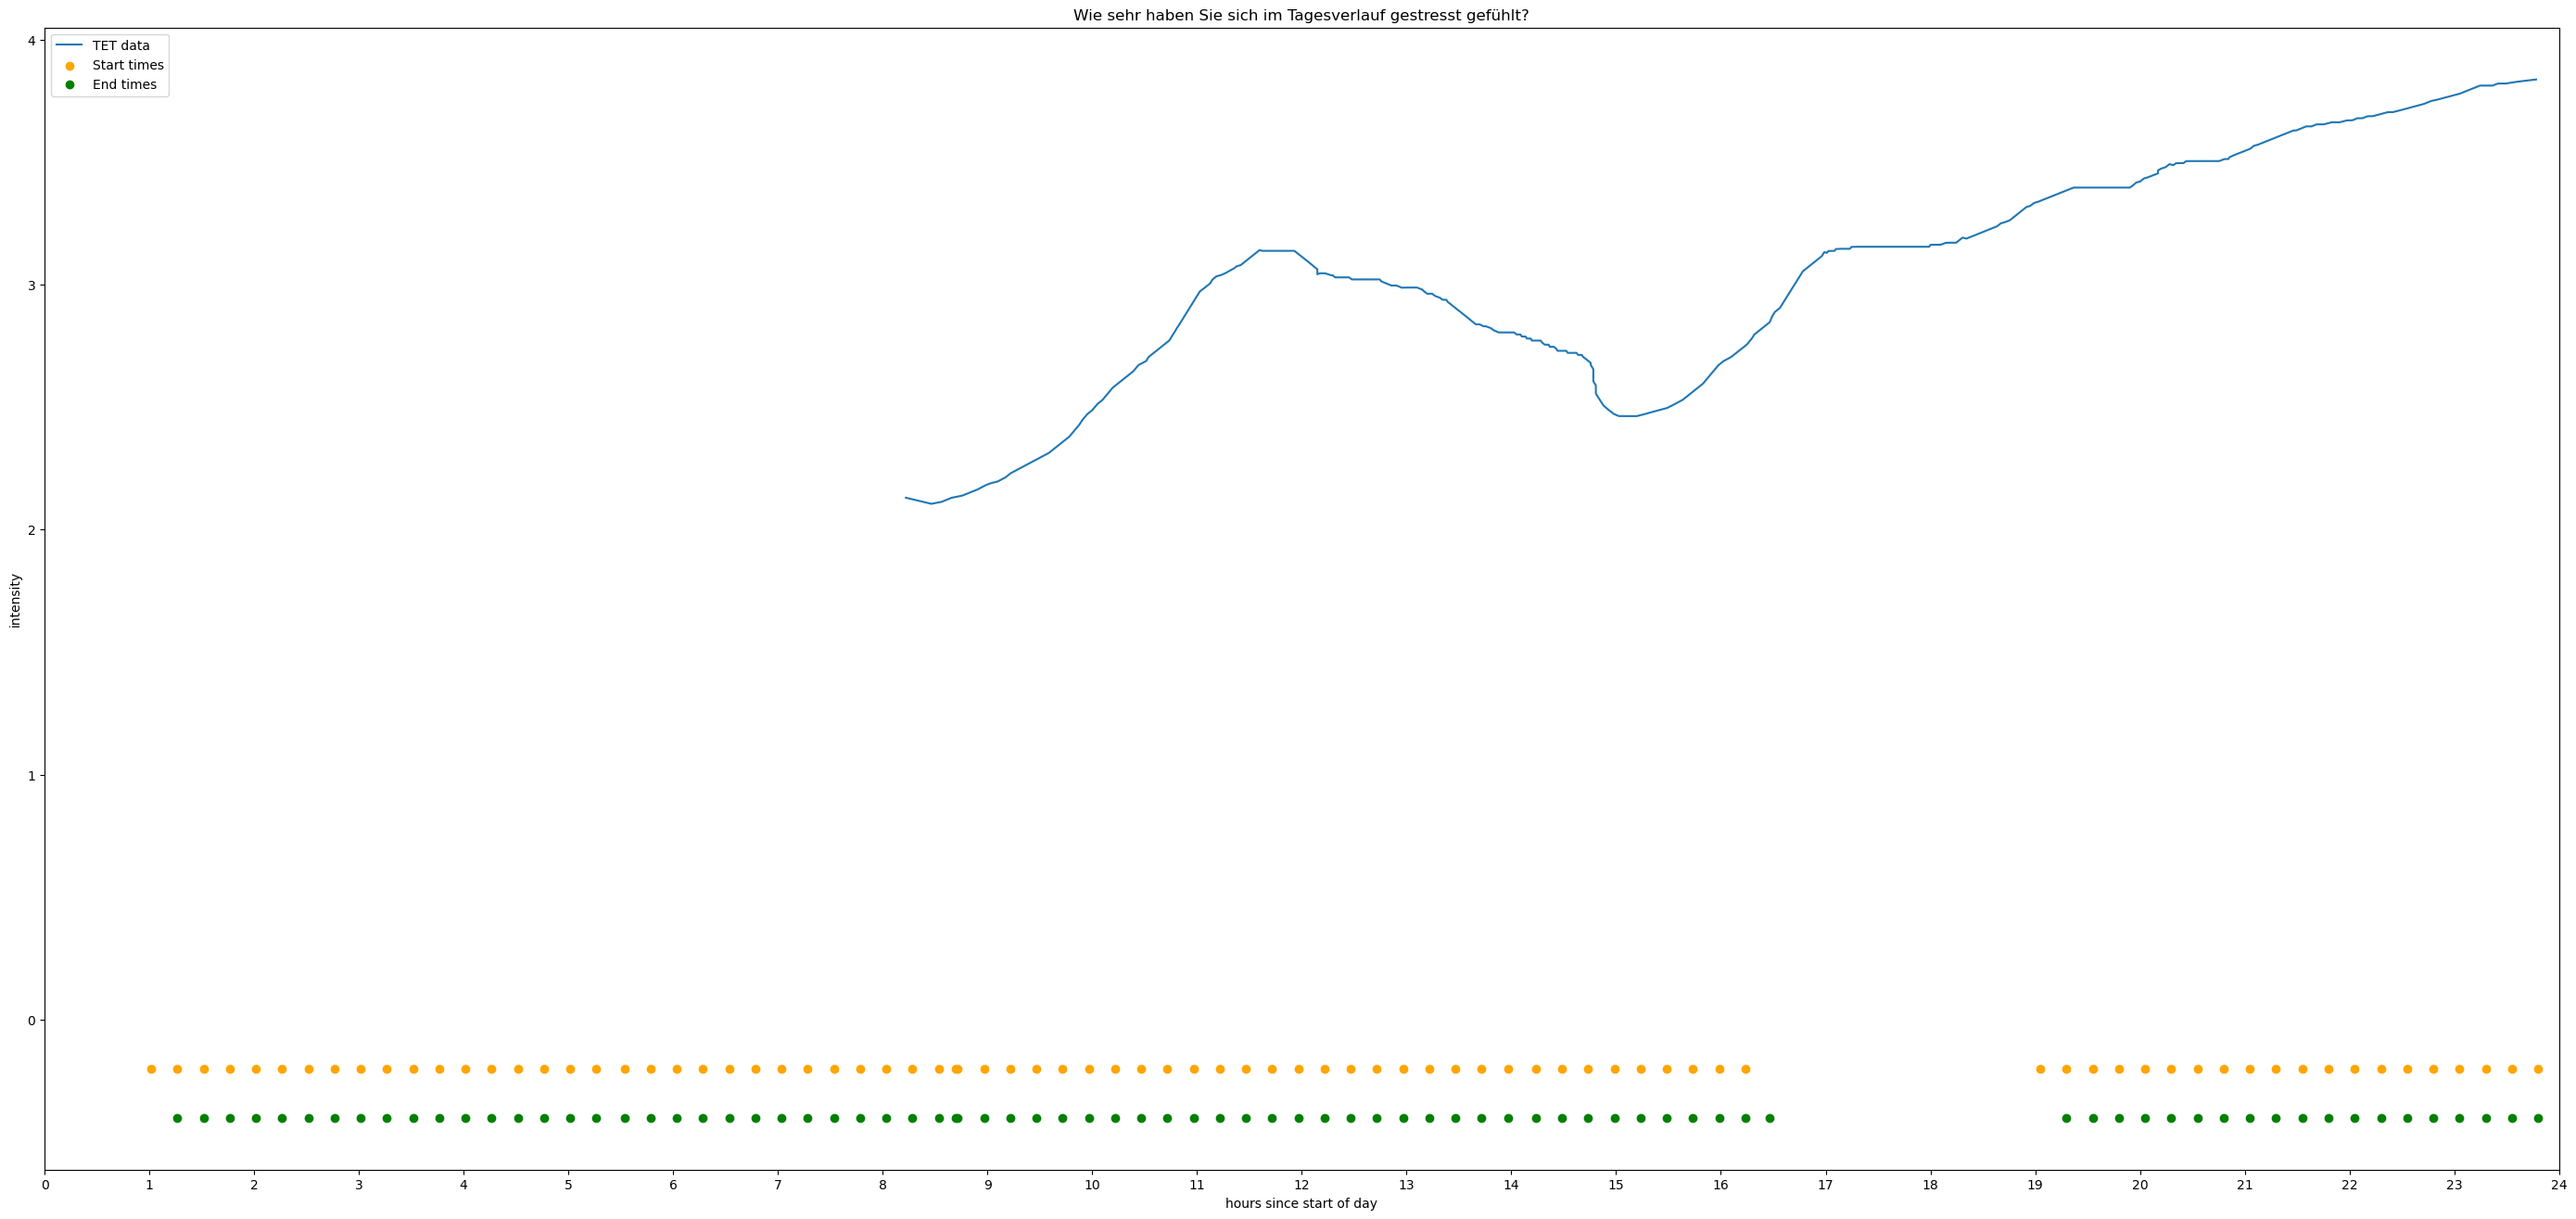

In [100]:
"""
now to plot TET data, start and end times all in one graph
"""
x, y, q, title, fig_folder = get_req_ips(parentfolder, folder2, dict_TET_map, question_dict)

#Plotting
plt.figure(figsize=(35, 16))  
plt.plot(x*6, y, label='TET data')  # Plot using x_val as x-axis and y_val as y-axis
plt.scatter(start_times, ys, color = 'orange', label='Start times')
plt.scatter(end_times, ye, color = 'green', label='End times')
plt.xlim(0, 24)
plt.xticks(range(0, 25, 1))

#title and labels
plt.title(title)
plt.xlabel('hours since start of day')
plt.ylabel('intensity')

#legend
plt.legend()

#saving and displaying figure
#plt.savefig(os.path.join(fig_folder, ('TET_' + q + '_rawdata_timeavailability_new.png')))
plt.savefig(os.path.join(fig_folder, ('TET_q8_rawdata_timeavailability_new.png')))
plt.show()

In [ ]:
"""
enter the main dictionary from which the required x values should be extracted: dict_TET_x8
x assigned
enter the main dictionary from which the required y values should be extracted: dict_TET_y8
y assigned
enter the question number (in the form q1, q2, q3, etc): q8
"""

In [101]:
"""
Now, need to aggregate and align the eda aggregated per minute which has the scl values throughout the day aggregated by minute
Since this file has timestamps in ISO, need to readjust it to align with CET timezone
"""
"""
#insert file name via 'copy as path' on windows. Therefore no need to replace with 'os.path.join', etc
filepath_eda = input('enter filepath to the required eda aggr file (via "copy as path" on windows): ')
df_eda_aggr = pd.read_csv(filepath_eda)
"""
"""
To incorporate temperature and acc data as well. Starting out with what is given in the per minute aggregated datasets and averaging that for every 15 minutes.
"""
#same as aggr eda, enter file name via "copy as path" for windows
filepath_temp = input('enter filepath to the required temp aggr file (via "copy as path" on windows): ')
df_temp_aggr = pd.read_csv(filepath_temp)

#same as aggr eda, enter file name via "copy as path" for windows
filepath_devrec = input('enter filepath to the required device recording file (via "copy as path" on windows): ')
df_devrec_aggr = pd.read_csv(filepath_devrec)

"""
filepath_acc = input('enter filepath to the required acc aggr file (via "copy as path" on windows): ')
df_acc_aggr = pd.read_csv(filepath_acc)
"""

enter filepath to the required temp aggr file (via "copy as path" on windows):  C:\Users\Ananya Rao\Documents\Stream_HC_002_test_filt\05_11_23_n2_6_11_23_d\empatica\aggr_p_min\1-1-05_2023-11-06_temperature.csv
enter filepath to the required device recording file (via "copy as path" on windows):  C:\Users\Ananya Rao\Documents\Stream_HC_002_test_filt\05_11_23_n2_6_11_23_d\empatica\aggr_p_min\1-1-05_2023-11-06_wearing-detection.csv


'\nfilepath_acc = input(\'enter filepath to the required acc aggr file (via "copy as path" on windows): \')\ndf_acc_aggr = pd.read_csv(filepath_acc)\n'

In [48]:
"""
Definition Block
"""
aggr_dict = {}
for i in range(0,len(df_eda_aggr['timestamp_iso']), 15):
    #1 added to convert the iso(utc) to cet
    aggr_dict[1 + int(df_eda_aggr['timestamp_iso'][i].split('T')[1].split(':')[0]) + (int(df_eda_aggr['timestamp_iso'][i].split('T')[1].split(':')[1]))/60] = df_eda_aggr['eda_scl_usiemens'][i:(i+15)].mean(skipna=True)

#aggr_dict
x_aggr = list(aggr_dict.keys())
y_aggr = list(aggr_dict.values())


enter the main dictionary from which the required x values should be extracted: dict_TET_x8
x assigned
enter the main dictionary from which the required y values should be extracted: dict_TET_y8
y assigned
enter the question number (in the form q1, q2, q3, etc): q8


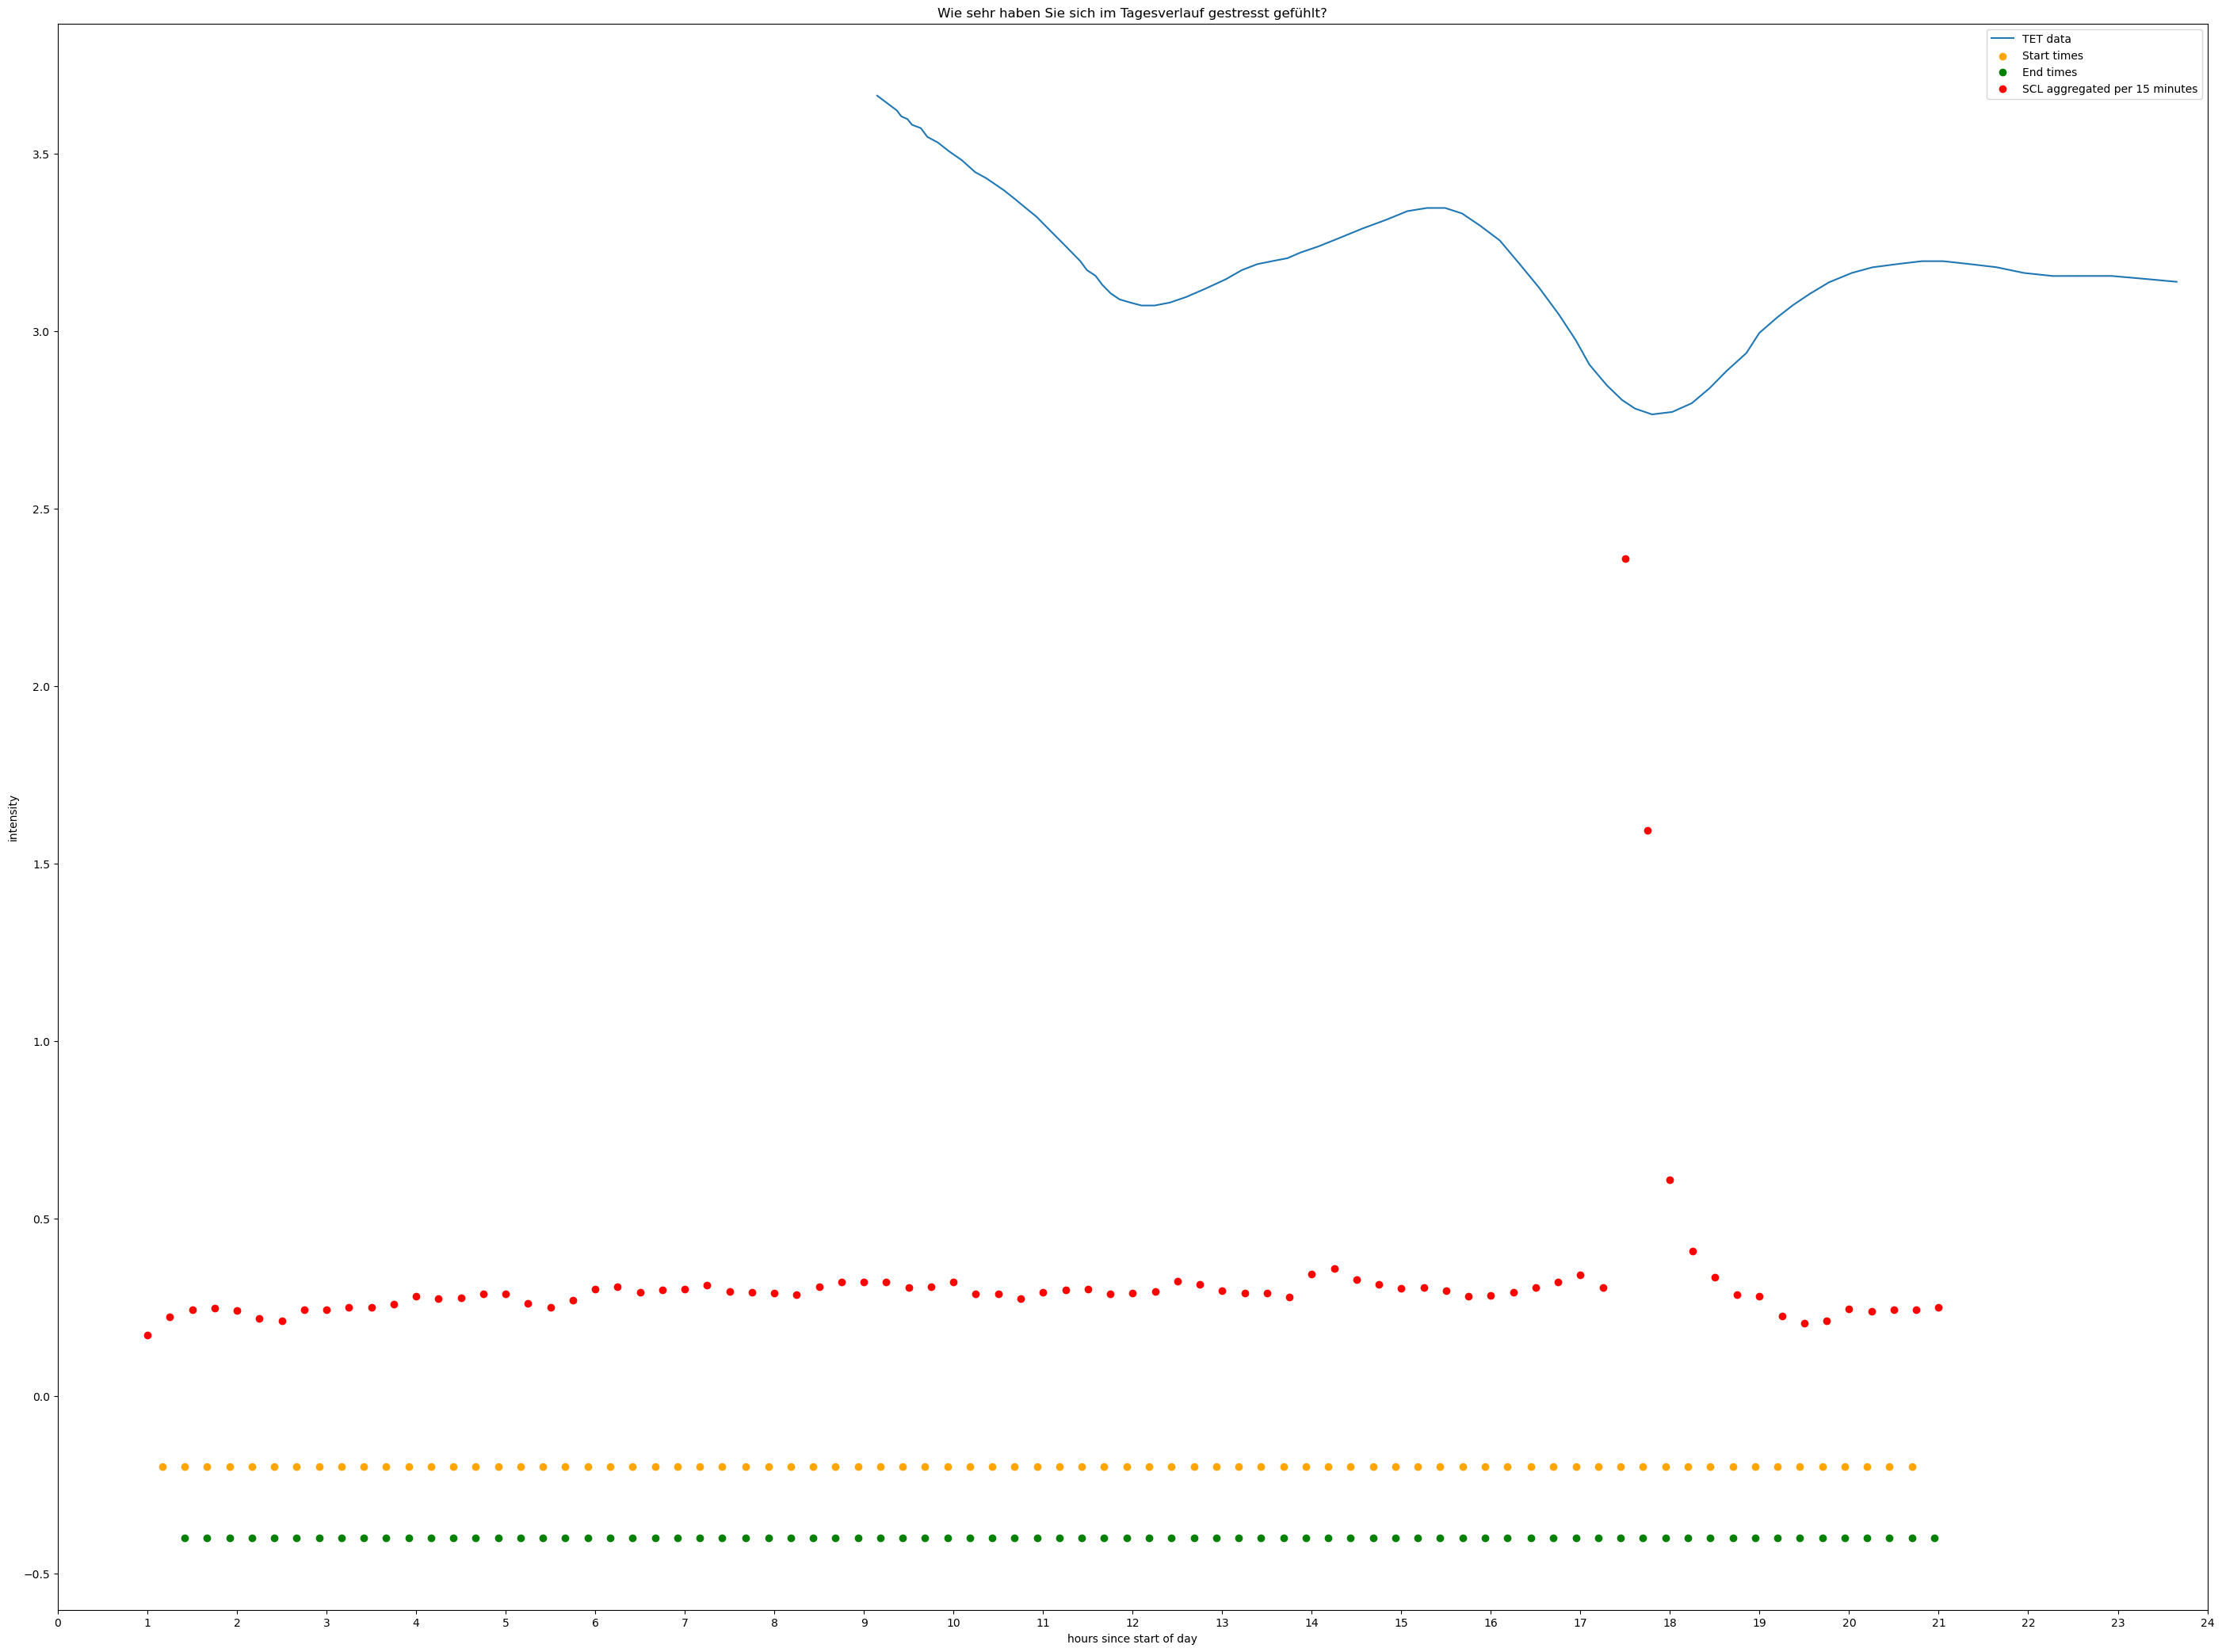

In [49]:
"""
now to plot TET data, start and end times, 15 minute aggr scl (obtained from per minute aggr scl) all in one graph
"""
x, y, q, title, fig_folder = get_req_ips(parentfolder, folder2, dict_TET_map, question_dict)

# Plotting
plt.figure(figsize=(35, 26))  
plt.plot(x*6, y, label='TET data')  # Plot using x_val as x-axis and y_val as y-axis
plt.scatter(start_times, ys, color = 'orange', label='Start times')
plt.scatter(end_times, ye, color = 'green', label='End times')
plt.scatter(x_aggr, y_aggr, color = 'red', label='SCL aggregated per 15 minutes')
plt.xlim(0, 24)
plt.xticks(range(0, 25, 1))

# Adding title and labels
plt.title(title)
plt.xlabel('hours since start of day')
plt.ylabel('intensity')

# Show legend
plt.legend()

plt.savefig(os.path.join(fig_folder, ('TET_' + q + '_aggr_scl_noscale.png')))
plt.show()

In [50]:
"""
Definition Block
Calculating the standardised version of the aggregate values of scl from empatica
"""
mean_val = np.nanmean(y_aggr)
std_dev = np.nanstd(y_aggr)
standardized_values = [(x - mean_val) / std_dev for x in y_aggr] 

enter the main dictionary from which the required x values should be extracted: dict_TET_x8
x assigned
enter the main dictionary from which the required y values should be extracted: dict_TET_y8
y assigned
enter the question number (in the form q1, q2, q3, etc): q8


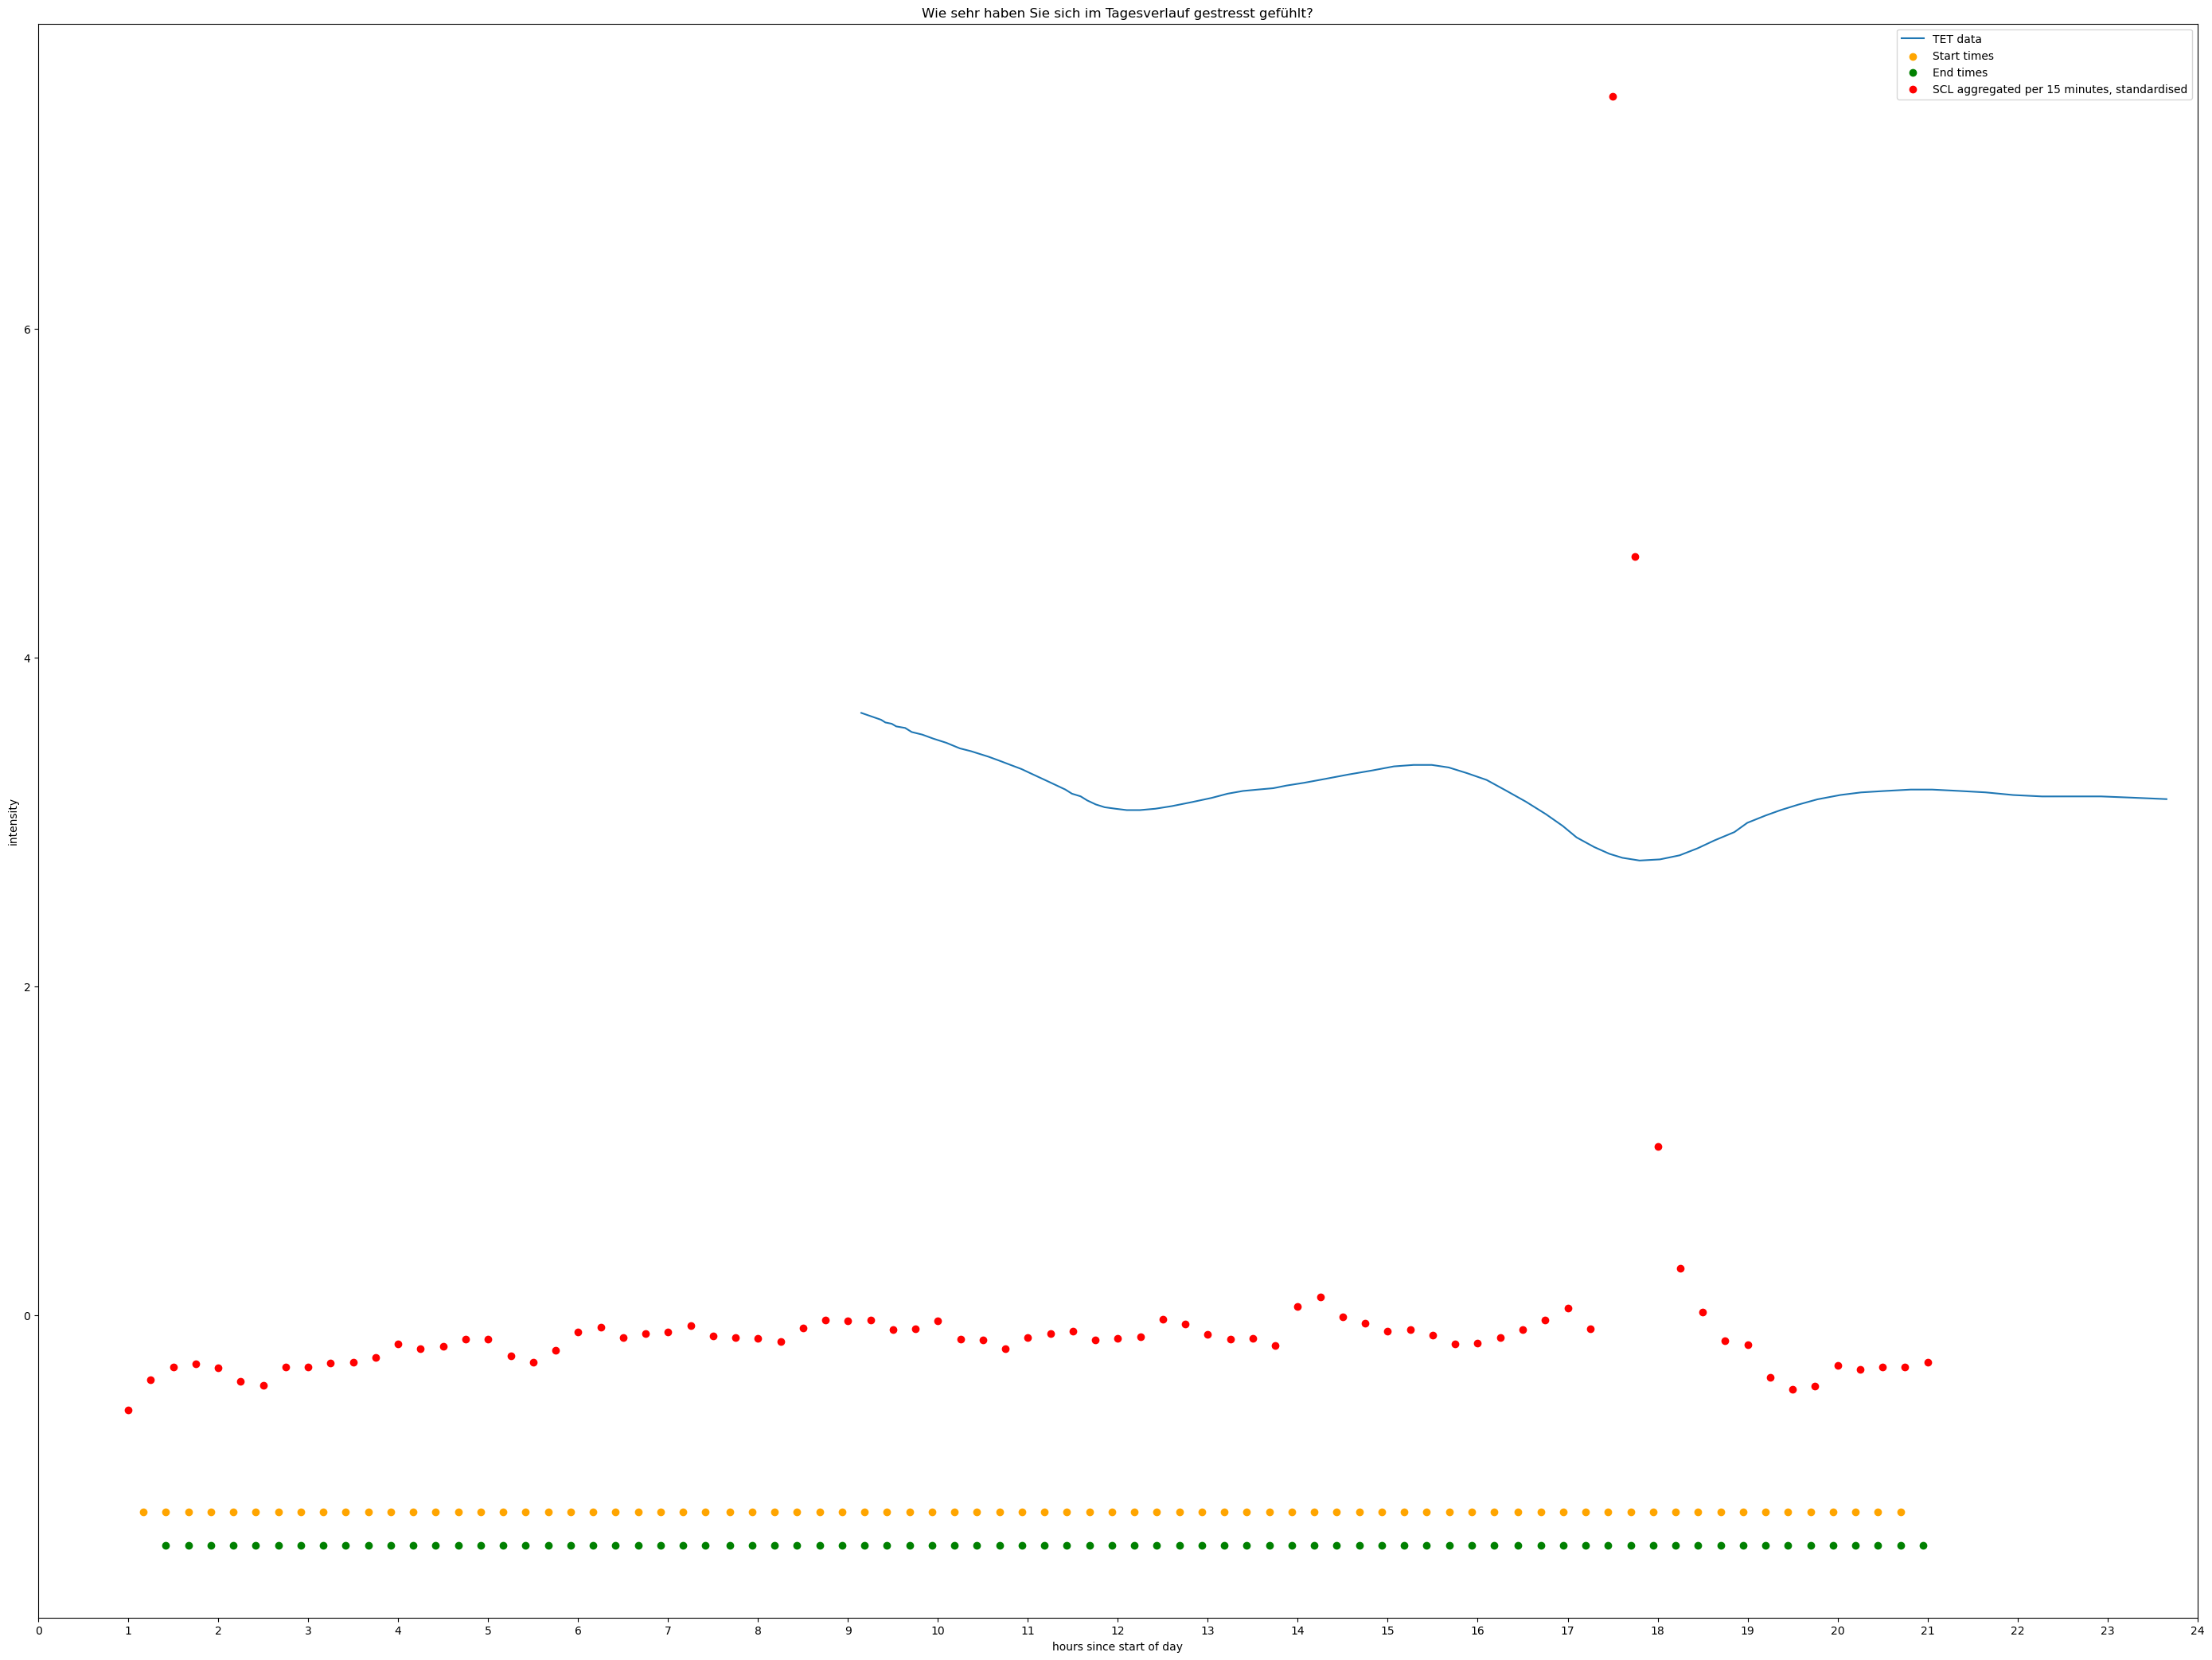

In [51]:
"""
now to plot them all but this time with the standardised version of the aggregate values
"""

x, y, q, title, fig_folder = get_req_ips(parentfolder, folder2, dict_TET_map, question_dict)

"""
now to plot TET data, start and end times, 15 minute aggr scl (obtained from per minute aggr scl) all in one graph
"""
ys = np.full(len(start_times), -1.2) #this line and the next retained here because the values have been changed
ye = np.full(len(end_times), -1.4)

# Plotting
plt.figure(figsize=(35, 26))  
plt.plot(x*6, y, label='TET data')  # Plot using x_val as x-axis and y_val as y-axis
plt.scatter(start_times, ys, color = 'orange', label='Start times')
plt.scatter(end_times, ye, color = 'green', label='End times')
plt.scatter(x_aggr, standardized_values, color = 'red', label='SCL aggregated per 15 minutes, standardised')
plt.xlim(0, 24)
plt.xticks(range(0, 25, 1))

# Adding title and labels
plt.title(title)
plt.xlabel('hours since start of day')
plt.ylabel('intensity')

# Show legend
plt.legend()

plt.savefig(os.path.join(fig_folder, ('TET_' + q + '_aggr_scl_standardised.png')))
plt.show()

In [52]:
"""
Definition Block
Calculating the min-max normalised version of the aggregate values of scl from empatica
"""
min_val = np.nanmin(y_aggr)
max_val = np.nanmax(y_aggr)
if min_val == max_val:
    print("Warning! Possible division by 0! Do not plot")
else:
    normalized_val = [(x - min_val) / (max_val - min_val) for x in y_aggr]

enter the main dictionary from which the required x values should be extracted: dict_TET_x8
x assigned
enter the main dictionary from which the required y values should be extracted: dict_TET_y8
y assigned
enter the question number (in the form q1, q2, q3, etc): q8


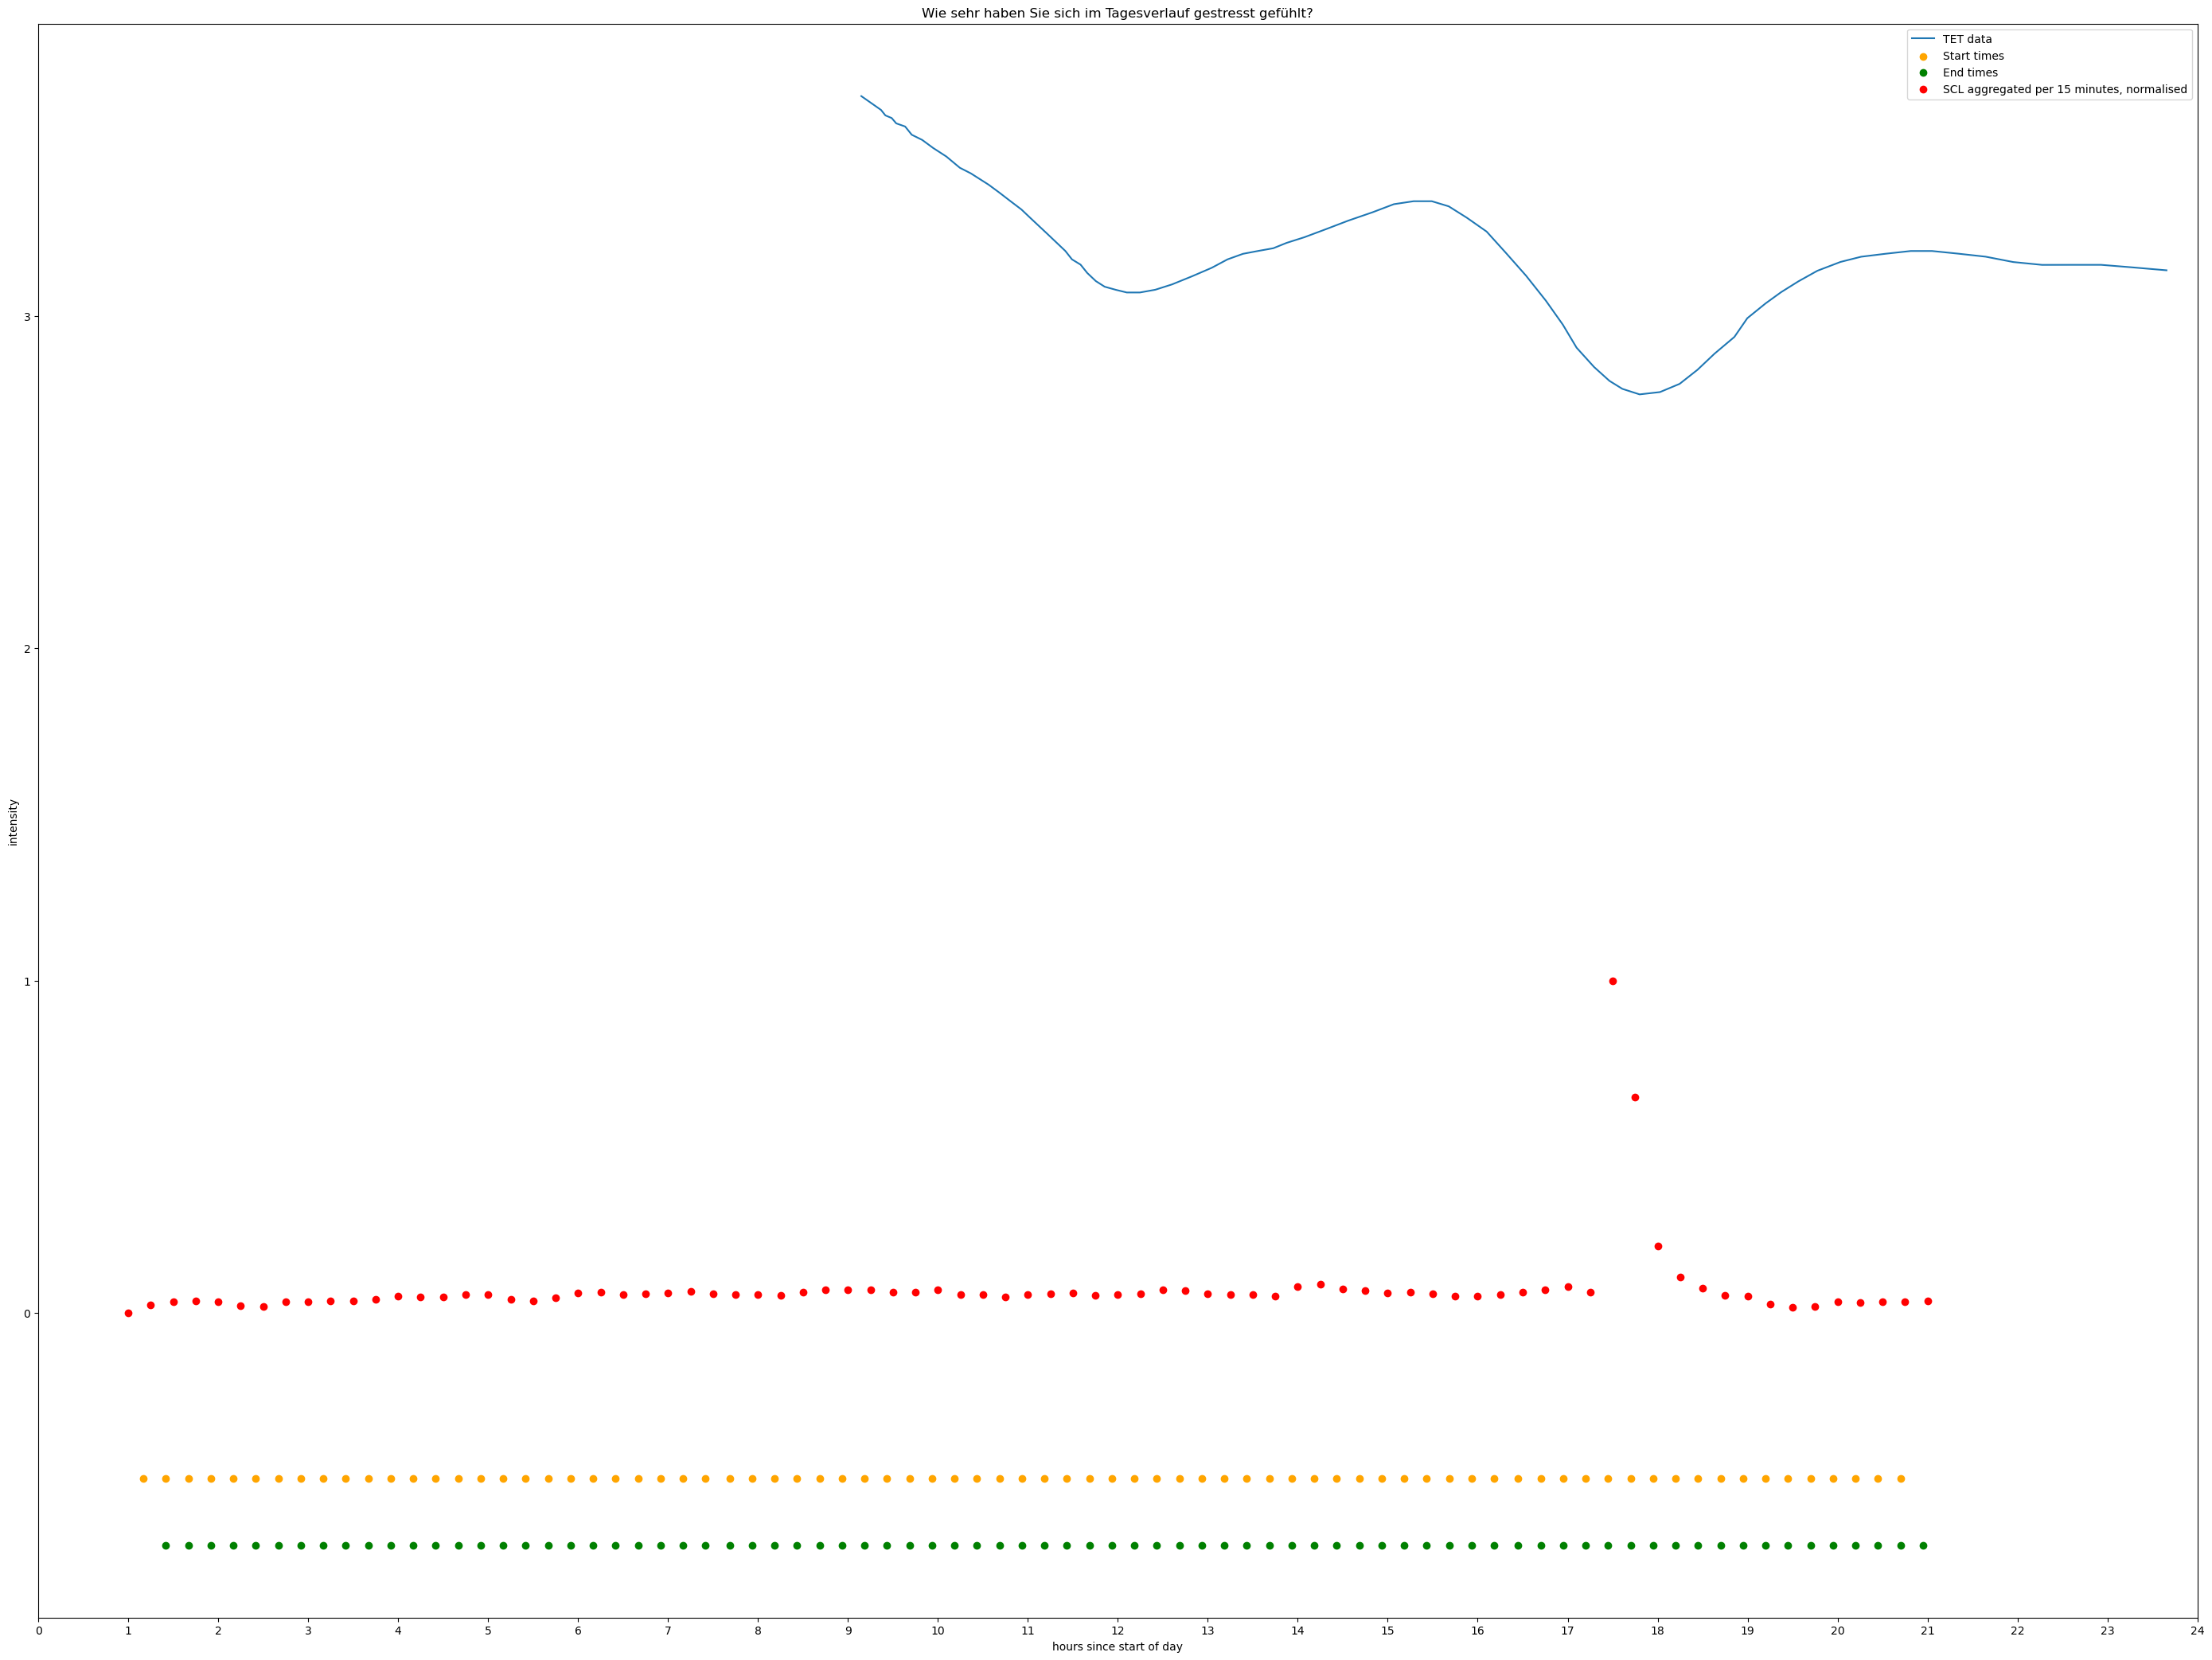

In [53]:
"""
now to plot them all but this time with min-max normalised version of the aggregate values
"""
x, y, q, title, fig_folder = get_req_ips(parentfolder, folder2, dict_TET_map, question_dict)

"""
now to plot TET data, start and end times, 15 minute aggr scl (obtained from per minute aggr scl) all in one graph
"""
ys = np.full(len(start_times), -0.5) #retained because value changed
ye = np.full(len(end_times), -0.7)

# Plotting
plt.figure(figsize=(35, 26))  
plt.plot(x*6, y, label='TET data')  # Plot using x_val as x-axis and y_val as y-axis
plt.scatter(start_times, ys, color = 'orange', label='Start times')
plt.scatter(end_times, ye, color = 'green', label='End times')
plt.scatter(x_aggr, normalized_val, color = 'red', label='SCL aggregated per 15 minutes, normalised')
plt.xlim(0, 24)
plt.xticks(range(0, 25, 1))

# Adding title and labels
plt.title(title)
plt.xlabel('hours since start of day')
plt.ylabel('intensity')

# Show legend
plt.legend()
plt.savefig(os.path.join(fig_folder, ('TET_' + q + '_aggr_scl_minmaxnorm.png')))
plt.show()

In [102]:
"""
Definition Block
"""
aggr_dict_temp = {}
for i in range(0,len(df_temp_aggr['timestamp_iso']), 15):
    #1 added to convert the iso(utc) to cet. The '1' can be changed keeping in mind daylight savings time and so on
    aggr_dict_temp[1 + int(df_temp_aggr['timestamp_iso'][i].split('T')[1].split(':')[0]) + (int(df_temp_aggr['timestamp_iso'][i].split('T')[1].split(':')[1]))/60] = df_temp_aggr['temperature_celsius'][i:(i+15)].mean(skipna=True)/10

aggr_dict_devrec = {}
for i in range(0,len(df_devrec_aggr['timestamp_iso']), 15):
    #1 added to convert the iso(utc) to cet. The '1' can be changed keeping in mind daylight savings time and so on
    aggr_dict_devrec[1 + int(df_devrec_aggr['timestamp_iso'][i].split('T')[1].split(':')[0]) + (int(df_devrec_aggr['timestamp_iso'][i].split('T')[1].split(':')[1]))/60] = df_devrec_aggr['wearing_detection_percentage'][i:(i+15)].mean(skipna=True)/100


"""
aggr_dict_acc = {}
for i in range(0,len(df_acc_aggr['timestamp_iso']), 15):
    #1 added to convert the iso(utc) to cet
    aggr_dict_acc[1 + int(df_acc_aggr['timestamp_iso'][i].split('T')[1].split(':')[0]) + (int(df_acc_aggr['timestamp_iso'][i].split('T')[1].split(':')[1]))/60] = df_acc_aggr['accelerometers_std_g'][i:(i+15)].mean(skipna=True)
"""

x_aggr_temp = list(aggr_dict_temp.keys())
y_aggr_temp = list(aggr_dict_temp.values())
#y_aggr_temp

x_aggr_devrec = list(aggr_dict_devrec.keys())
y_aggr_devrec = list(aggr_dict_devrec.values())
#y_aggr_temp

"""
x_aggr_acc = list(aggr_dict_acc.keys())
y_aggr_acc = list(aggr_dict_acc.values())
#y_aggr_acc
"""

"""
min-max for temp and acc

min_val_temp = np.nanmin(y_aggr_temp)
max_val_temp = np.nanmax(y_aggr_temp)
normalized_val_temp = [(x - min_val_temp) / (max_val_temp - min_val_temp) for x in y_aggr_temp]

min_val_acc = np.nanmin(y_aggr_acc)
max_val_acc = np.nanmax(y_aggr_acc)
normalized_val_acc = [(x - min_val_acc) / (max_val_acc - min_val_acc) for x in y_aggr_acc]
"""

'\nmin-max for temp and acc\n\nmin_val_temp = np.nanmin(y_aggr_temp)\nmax_val_temp = np.nanmax(y_aggr_temp)\nnormalized_val_temp = [(x - min_val_temp) / (max_val_temp - min_val_temp) for x in y_aggr_temp]\n\nmin_val_acc = np.nanmin(y_aggr_acc)\nmax_val_acc = np.nanmax(y_aggr_acc)\nnormalized_val_acc = [(x - min_val_acc) / (max_val_acc - min_val_acc) for x in y_aggr_acc]\n'

enter the main dictionary from which the required x values should be extracted:  dict_TET_x8


x assigned


enter the main dictionary from which the required y values should be extracted:  dict_TET_y8


y assigned


enter the question number (in the form q1, q2, q3, etc):  "q8"


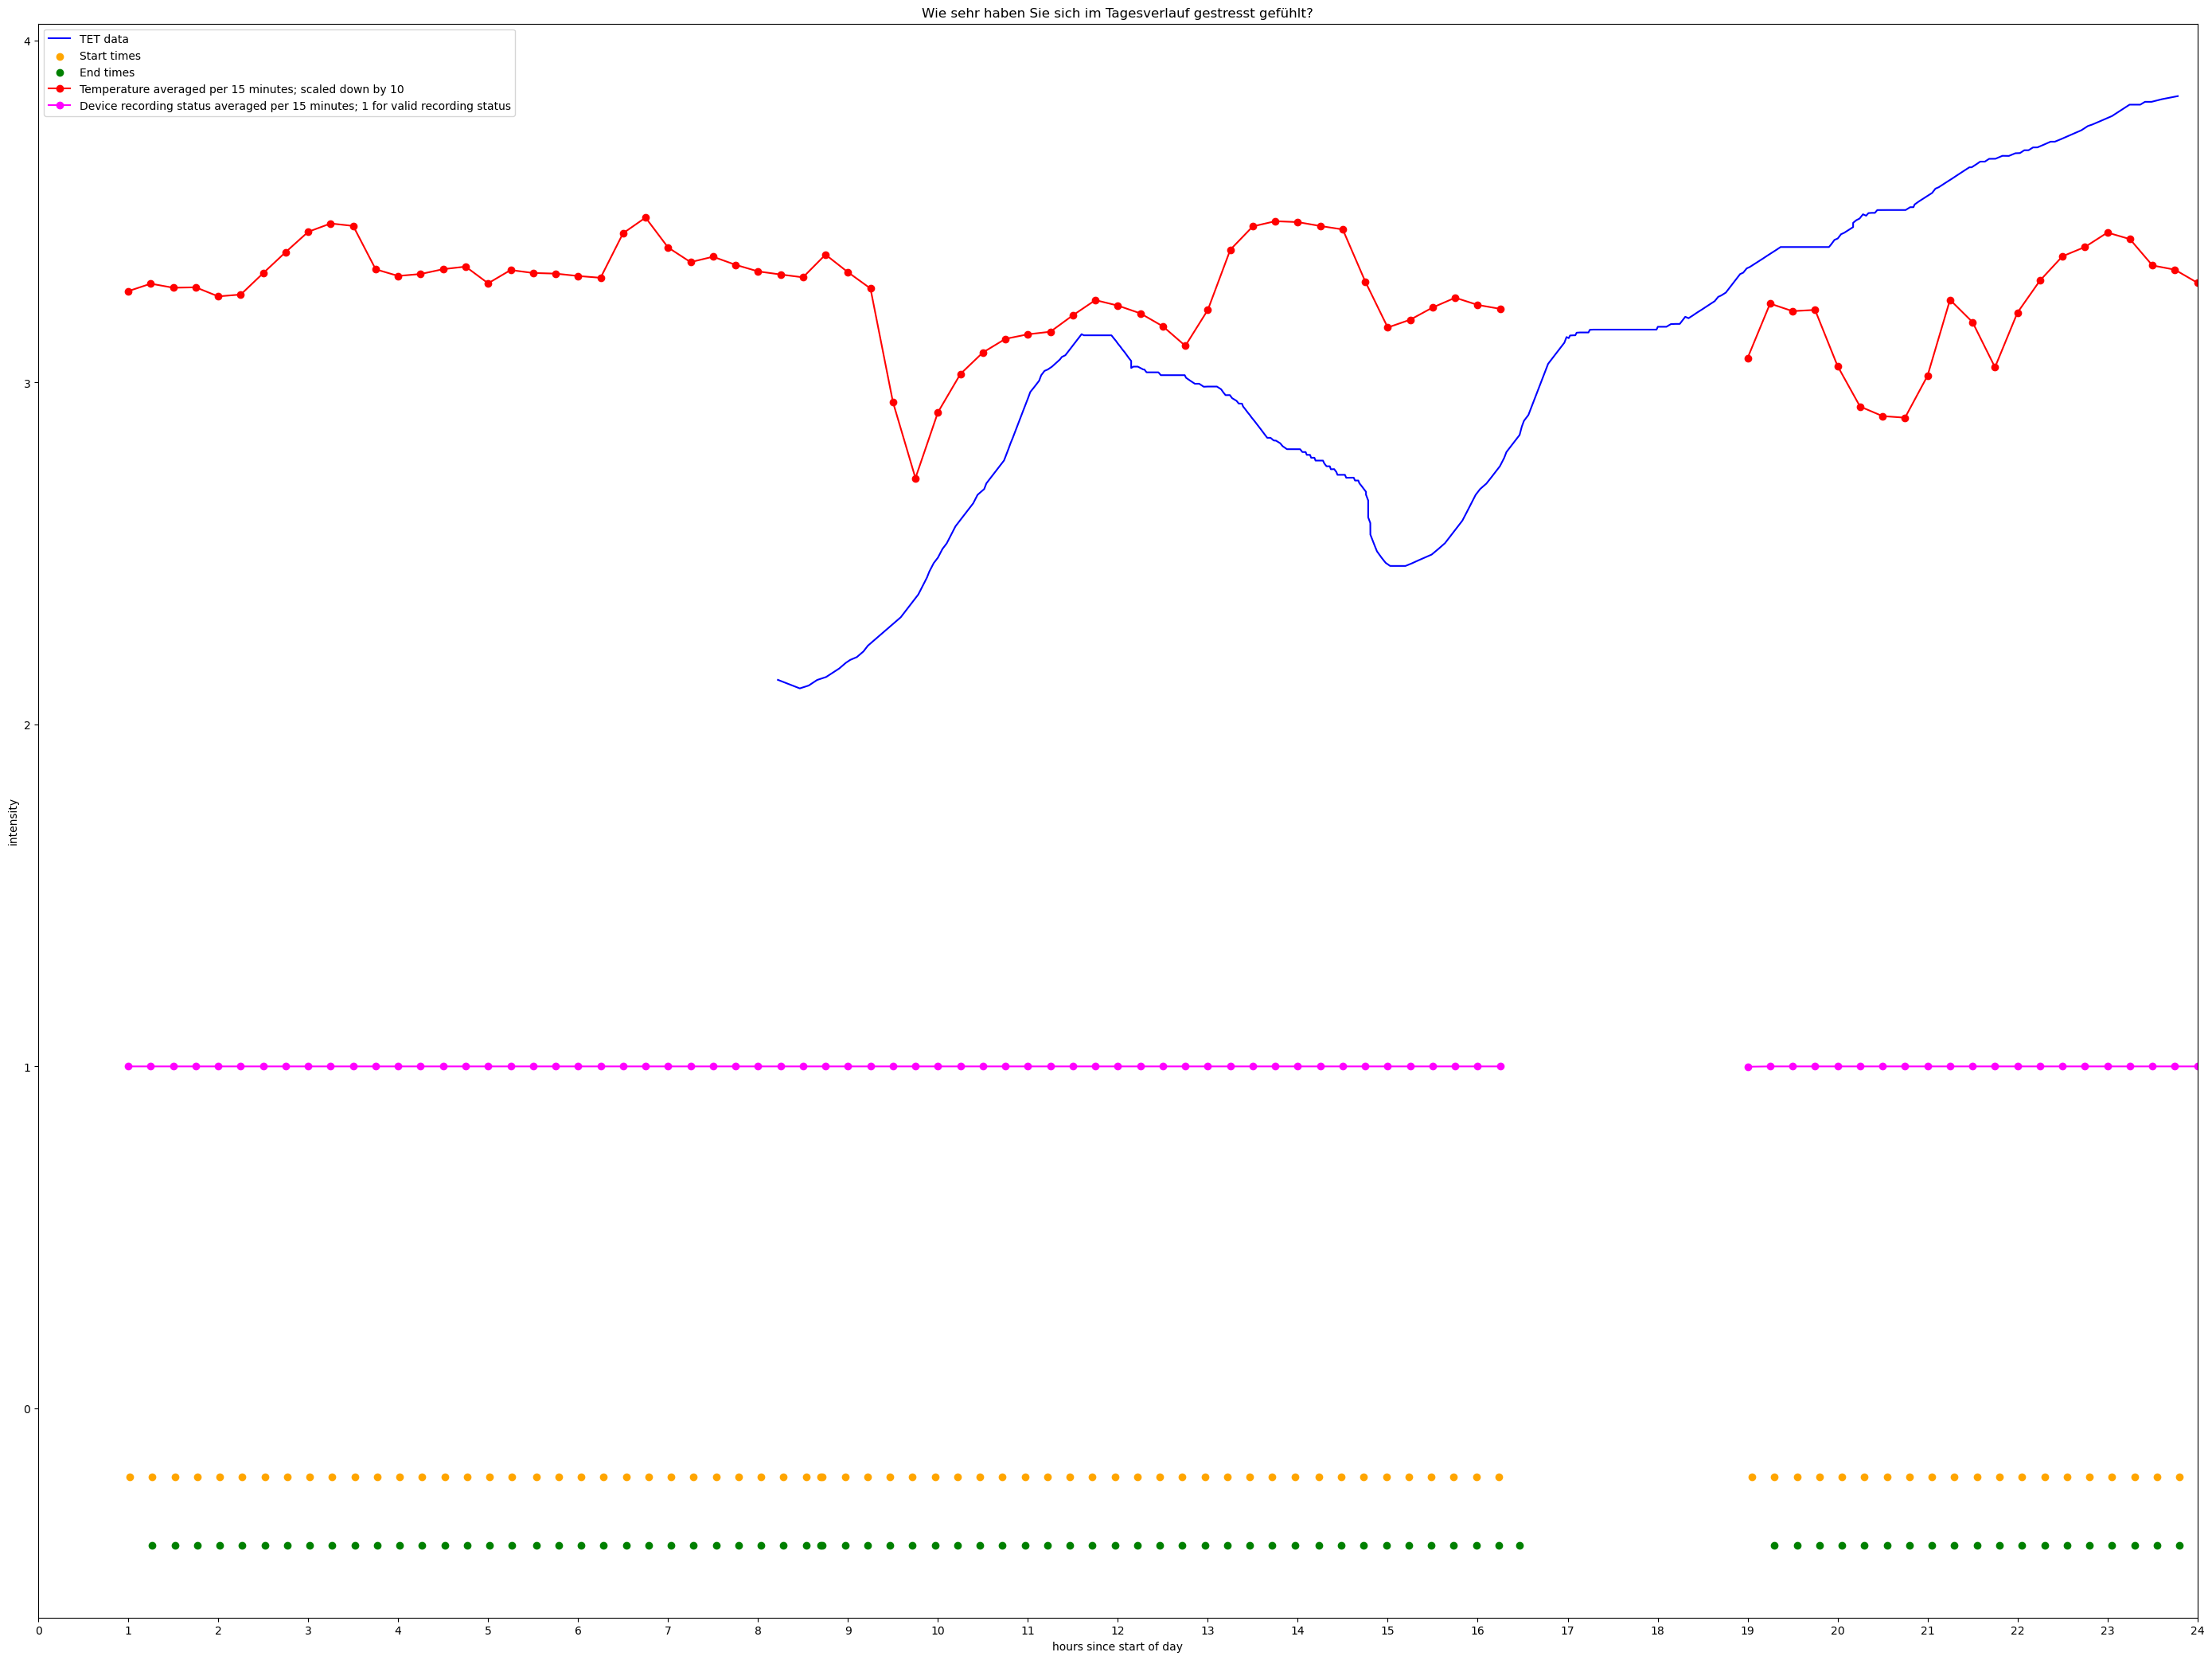

In [64]:
"""
adding temp and devrec values from the aggregated files
"""

x, y, q, title, fig_folder = get_req_ips(parentfolder, folder2, dict_TET_map, question_dict)

"""
now need to pair up the obtained scr and scl means with the right x values and plot their normalised version along with everything else
chosen x values to pair up with: start_times of the raw files from which they were obtained. 
"""

"""
now trying to plot them all but this time with min-max normalised version of the aggregate values
"""

"""
min-max for scl and scr
"""

"""
min-max for temp and acc
"""

"""
now to plot TET data, start and end times, 15 minute aggr scl (obtained from per minute aggr scl) all in one graph and scl,scr from flirt
"""

# Plotting
plt.figure(figsize=(25, 16))  
plt.plot(x*6, y, color = 'blue', label='TET data')  # Plot using x_val as x-axis and y_val as y-axis
plt.scatter(start_times, ys, color = 'orange', label='Start times')
plt.scatter(end_times, ye, color = 'green', label='End times')

#plt.plot(x_aggr, normalized_val, marker='o', linestyle='-', color = 'red', label='SCL aggregated per 15 minutes, normalised')
plt.plot(x_aggr_temp, y_aggr_temp, marker='o', linestyle='-', color = 'red', label='Temperature averaged per 15 minutes; scaled down by 10')
plt.plot(x_aggr_devrec, y_aggr_devrec, marker='o', linestyle='-', color = 'magenta', label='Device recording status averaged per 15 minutes; 1 for valid recording status')
#plt.plot(x_aggr_acc, normalized_val_acc, marker='o', linestyle='-', color = 'magenta', label='Standard deviation of the accelerometer magnitude aggregated per 15 minutes, normalised')


plt.xlim(0, 24)
plt.xticks(range(0, 25, 1))

# Adding title and labels
plt.title(title)
plt.xlabel('hours since start of day')
plt.ylabel('intensity')

# Show legend
plt.legend()

#plt.savefig(os.path.join(fig_folder, ('TET_' + q + '_aggr_scl_temp_acc.png')))
plt.savefig(os.path.join(fig_folder, ('TET_q8_aggr_temp_devrec.png')))
plt.show()


enter the main dictionary from which the required x values should be extracted:  dict_TET_x8


x assigned


enter the main dictionary from which the required y values should be extracted:  dict_TET_y8


y assigned


enter the question number (in the form q1, q2, q3, etc):  "q8"


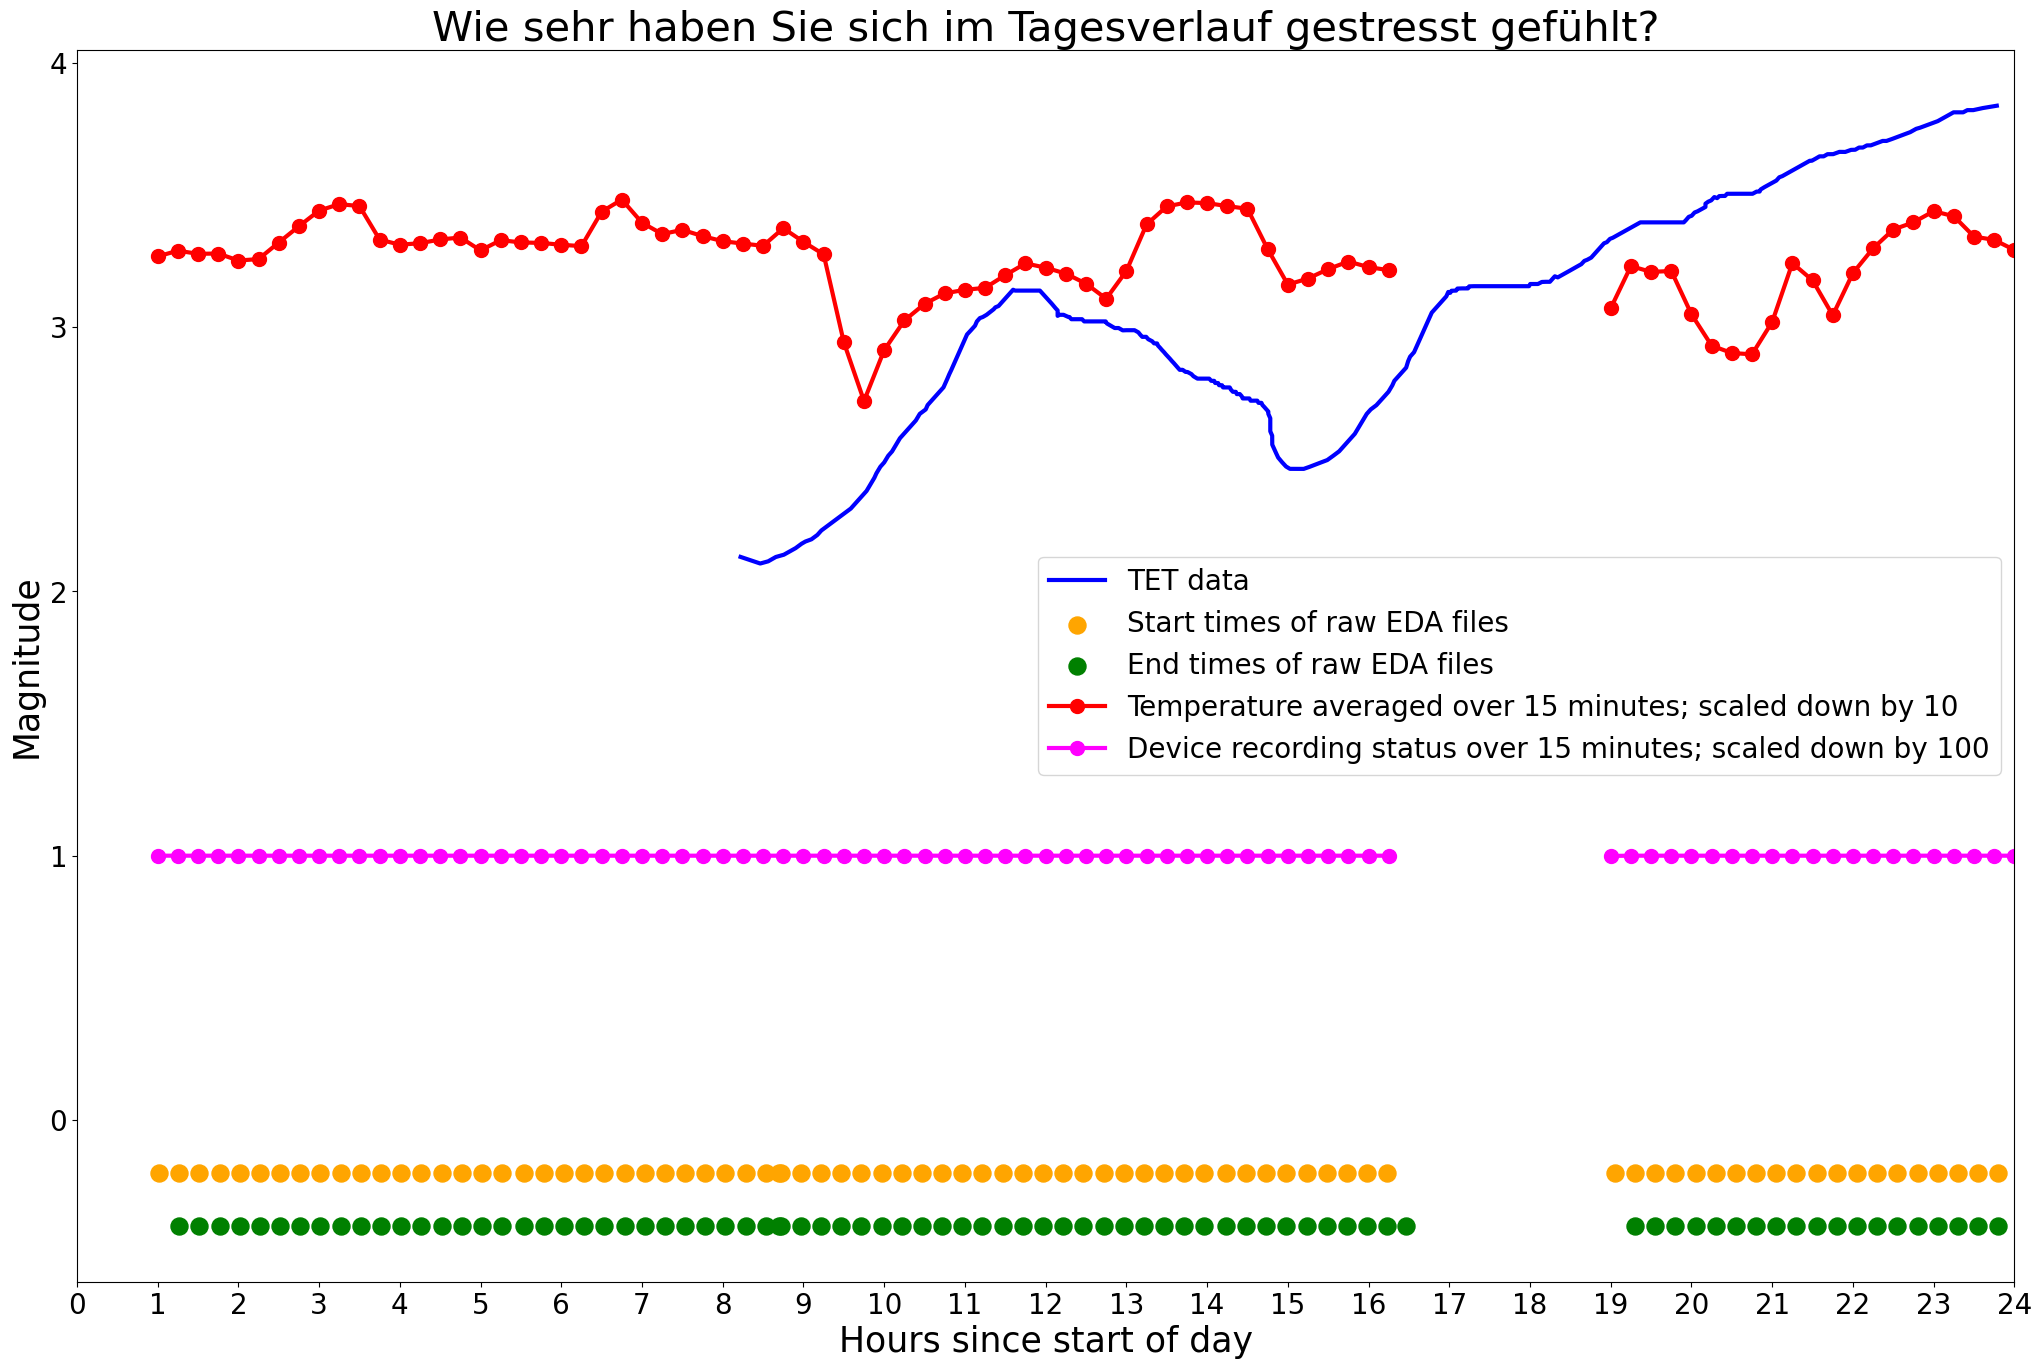

In [103]:
"""
adding temp and devrec values from the aggregated files
"""

x, y, q, title, fig_folder = get_req_ips(parentfolder, folder2, dict_TET_map, question_dict)

"""
now need to pair up the obtained scr and scl means with the right x values and plot their normalised version along with everything else
chosen x values to pair up with: start_times of the raw files from which they were obtained. 
"""

"""
now trying to plot them all but this time with min-max normalised version of the aggregate values
"""

"""
min-max for scl and scr
"""

"""
min-max for temp and acc
"""

"""
now to plot TET data, start and end times, 15 minute aggr scl (obtained from per minute aggr scl) all in one graph and scl,scr from flirt
"""

# Plotting
plt.figure(figsize=(25, 16))  

# Plot the main TET data
plt.plot(x*6, y, color='blue', label='TET data', linewidth=3)  # Thicker line

# Scatter for start and end times
plt.scatter(start_times, ys, color='orange', label='Start times of raw EDA files', s=150)  # Larger dots
plt.scatter(end_times, ye, color='green', label='End times of raw EDA files', s=150)  # Larger dots

# Plotting the additional data with thicker lines and larger markers
plt.plot(x_aggr_temp, y_aggr_temp, marker='o', linestyle='-', color='red', label='Temperature averaged over 15 minutes; scaled down by 10', linewidth=3, markersize=10)
plt.plot(x_aggr_devrec, y_aggr_devrec, marker='o', linestyle='-', color='magenta', label='Device recording status over 15 minutes; scaled down by 100', linewidth=3, markersize=10)

# Setting the limits and ticks for x-axis
plt.xlim(0, 24)
plt.xticks(range(0, 25, 1), fontsize=20)  # Larger x-axis ticks

# Adding title and labels with larger font sizes
plt.title(title, fontsize=30)  # Larger title
plt.xlabel('Hours since start of day', fontsize=25)  # Larger x-axis label
plt.ylabel('Magnitude', fontsize=25)  # Larger y-axis label

# Larger y-ticks
plt.yticks(fontsize=20)

# Show legend with larger font
plt.legend(fontsize=20)

# Save the figure in high resolution (dpi=300)
plt.savefig(os.path.join(fig_folder, 'TET_q8_aggr_temp_devrec.png'), bbox_inches='tight', dpi=300)

# Display the plot
plt.show()


enter the main dictionary from which the required x values should be extracted: dict_TET_x8
x assigned
enter the main dictionary from which the required y values should be extracted: dict_TET_y8
y assigned
enter the question number (in the form q1, q2, q3, etc): q8


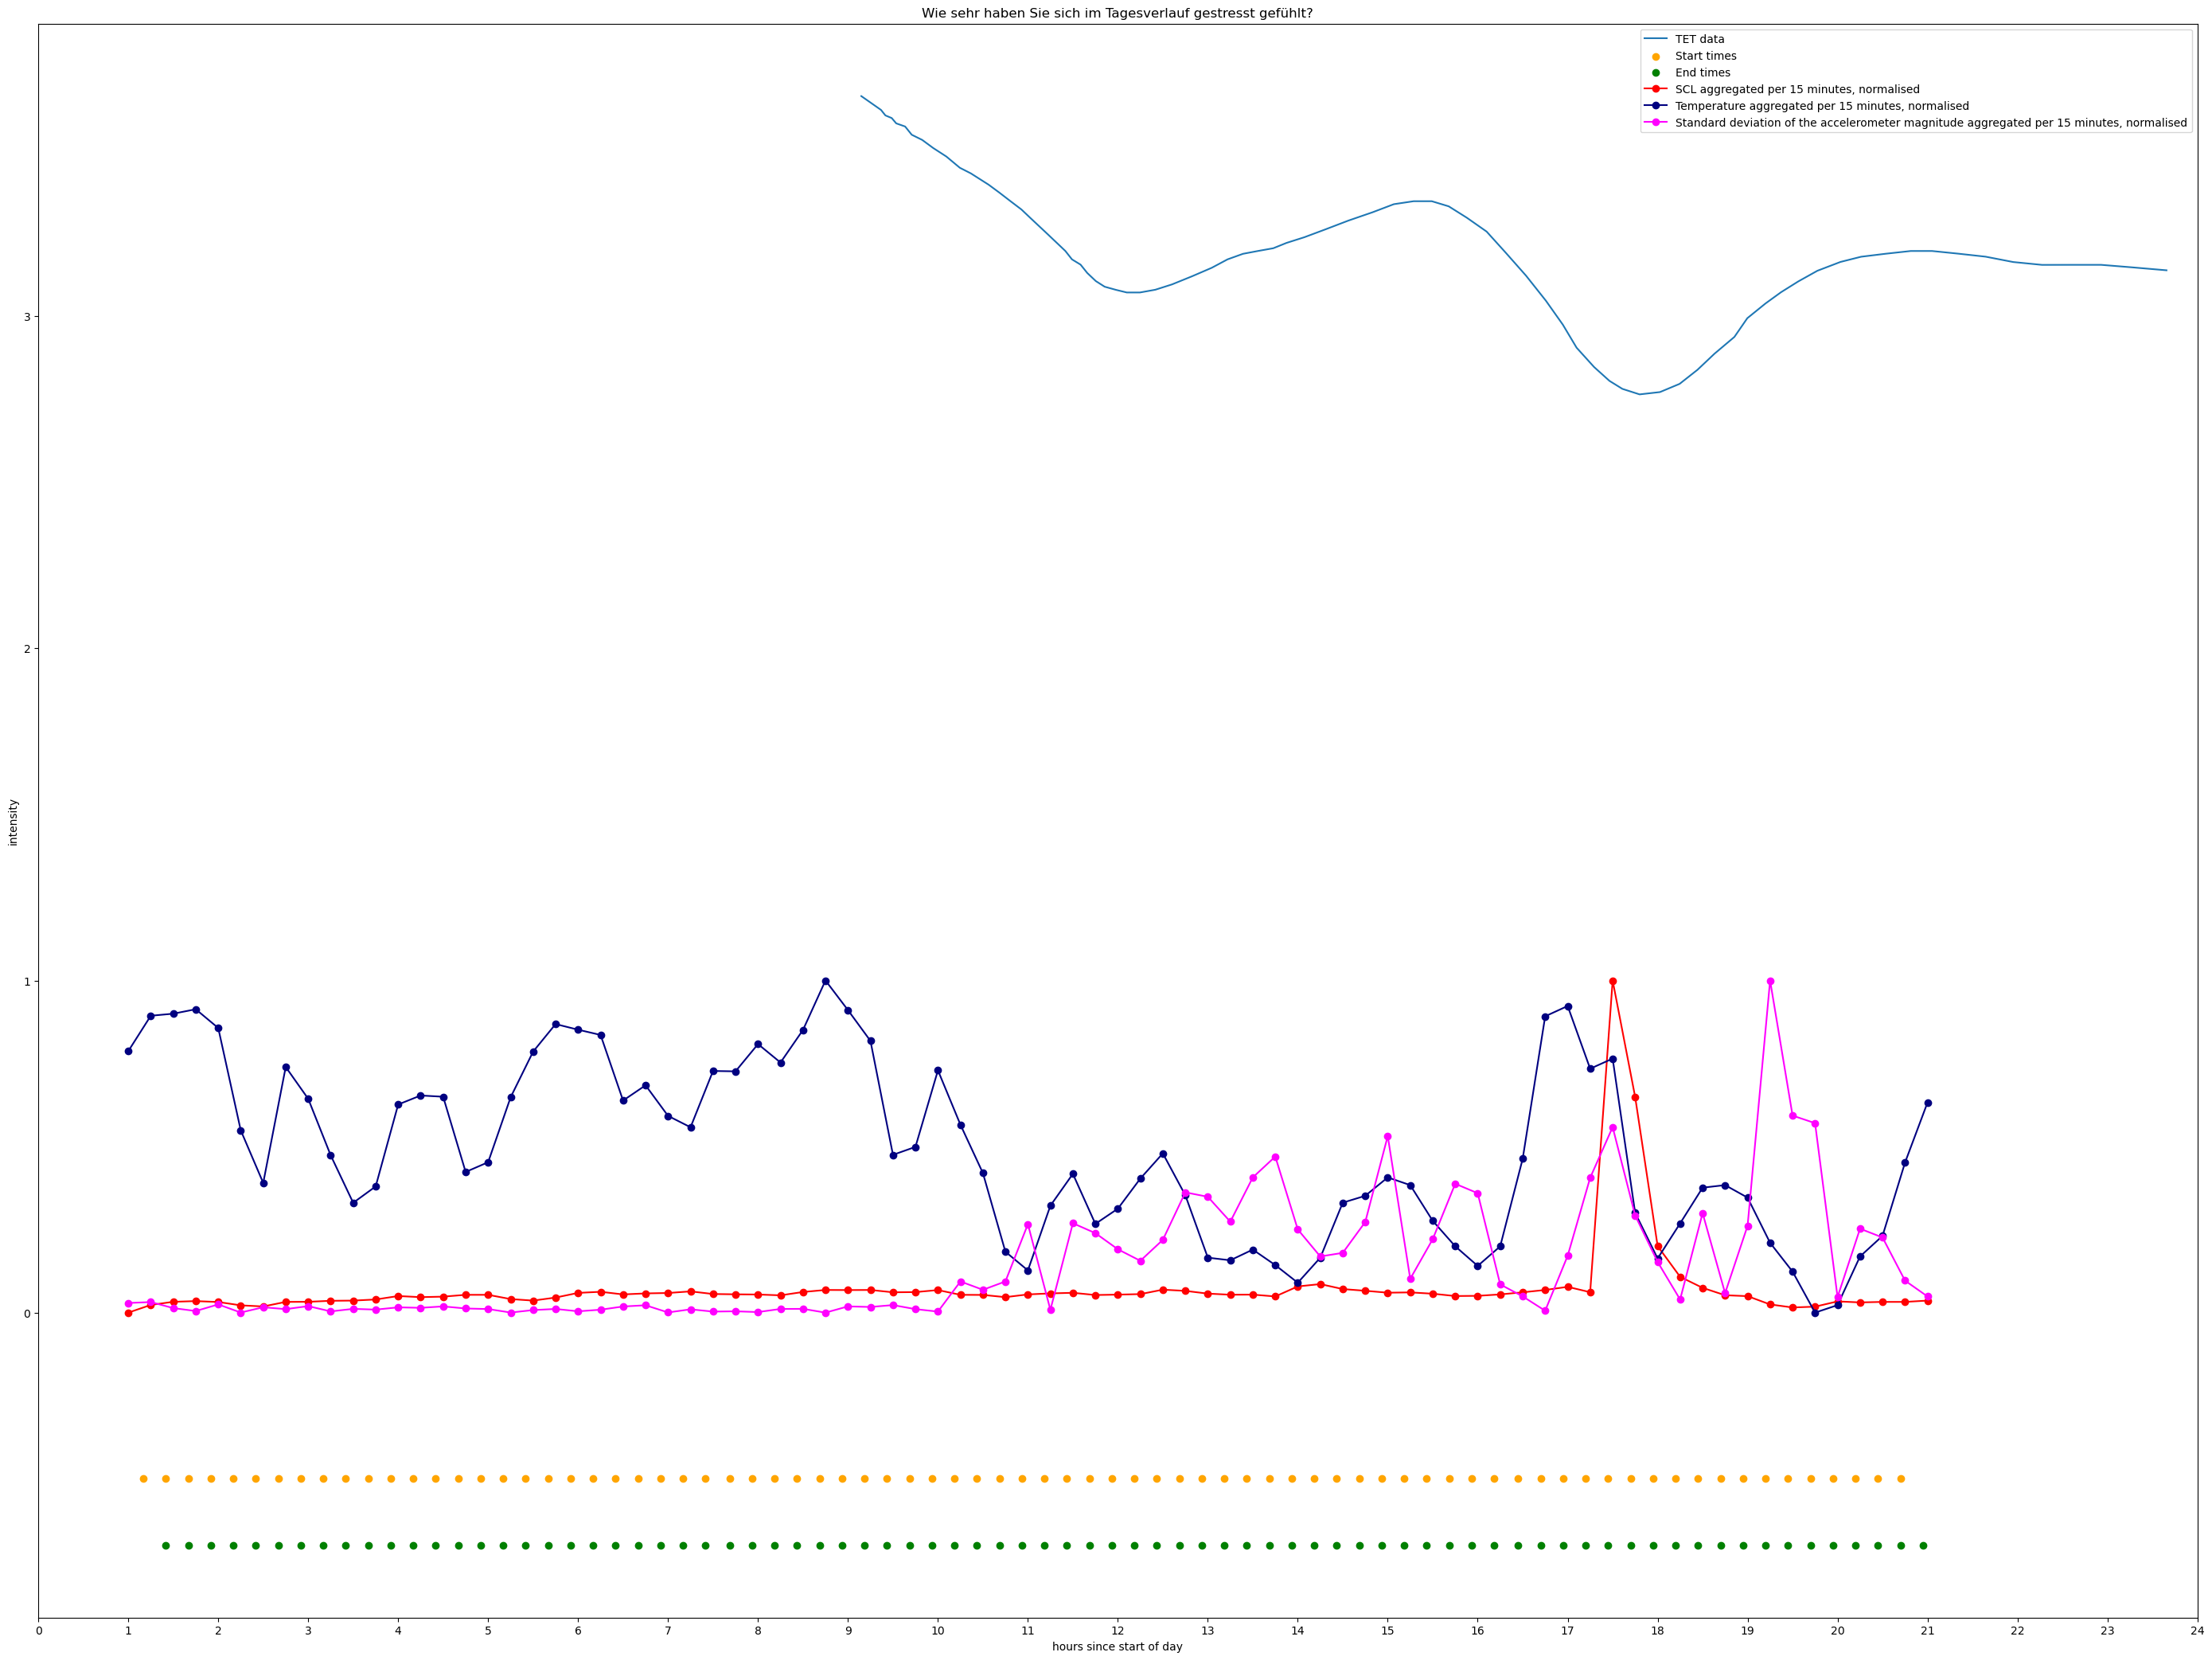

In [55]:
"""
adding temp and acc values from the aggregated files
"""

x, y, q, title, fig_folder = get_req_ips(parentfolder, folder2, dict_TET_map, question_dict)

"""
now need to pair up the obtained scr and scl means with the right x values and plot their normalised version along with everything else
chosen x values to pair up with: start_times of the raw files from which they were obtained. 
"""

"""
now trying to plot them all but this time with min-max normalised version of the aggregate values
"""

"""
min-max for scl and scr
"""

"""
min-max for temp and acc
"""

"""
now to plot TET data, start and end times, 15 minute aggr scl (obtained from per minute aggr scl) all in one graph and scl,scr from flirt
"""

# Plotting
plt.figure(figsize=(35, 26))  
plt.plot(x*6, y, label='TET data')  # Plot using x_val as x-axis and y_val as y-axis
plt.scatter(start_times, ys, color = 'orange', label='Start times')
plt.scatter(end_times, ye, color = 'green', label='End times')

#plt.plot(x_aggr, normalized_val, marker='o', linestyle='-', color = 'red', label='SCL aggregated per 15 minutes, normalised')
plt.plot(x_aggr_temp, normalized_val_temp, marker='o', linestyle='-', color = 'navy', label='Temperature aggregated per 15 minutes, normalised')
#plt.plot(x_aggr_acc, normalized_val_acc, marker='o', linestyle='-', color = 'magenta', label='Standard deviation of the accelerometer magnitude aggregated per 15 minutes, normalised')


plt.xlim(0, 24)
plt.xticks(range(0, 25, 1))

# Adding title and labels
plt.title(title)
plt.xlabel('hours since start of day')
plt.ylabel('intensity')

# Show legend
plt.legend()

#plt.savefig(os.path.join(fig_folder, ('TET_' + q + '_aggr_scl_temp_acc.png')))
plt.savefig(os.path.join(fig_folder, ('TET_' + q + '_aggr_temp_devrec.png')))
plt.show()


In [1]:
"""
convert to python script to use in other scripts if needed
"""
!jupyter nbconvert --to script l2s2_TET_Data_Processing.ipynb

[NbConvertApp] Converting notebook l2s2_TET_Data_Processing.ipynb to script
[NbConvertApp] Writing 34648 bytes to l2s2_TET_Data_Processing.py
